<a id="top"></a>
# CONNECTTEL CUSTOMER CHURN PREDICTION
---

The broad set of activities involved in carrying out the required analysis and prediction of Connecttel customer churn in the future using the provided data is outlined as follows:

1 - [Perform Exploratory Data Analysis](#phase1)  
2 - [Perform Feature Engineering](#phase2)  
3 - [Training, Testing and Validation using different ML algorithms](#phase3)  
4 - [Model Evaluation](#phase4)

<a id="phase1"></a>
## Exploratory Data Analysis (EDA)
---

In the EDA phase, the following processes will be undertaken:  
- [Data Analysis](#Initializing-Libraries) and [Preprocessing](#preprocessing)
- [Data Visualization](#Visualizations)
    - [Univariate](#Univariate-Analysis)
    - [Bivariate](#Bivariate-Analysis)
    - [Multivariate](#Multivariate-Analysis)

#### **Initializing Libraries**

In [4]:
#Data preprocessing libraries
import pandas as pd

#Data Visualization libraries
import seaborn as sns        
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### **Load and review the dataset**

In [5]:
df = pd.read_csv("Customer-Churn.csv")

# Print the top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Review the bottom 3 rows

df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Dimentionality of the data - For number of rows and columns

df.shape

(7043, 21)

>This shows that the data consists 7043 rows and 21 columns

In [8]:
# Investigating the dataset for anomalies and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


>A review of the data shows that it comprises of object (categorical), integer and float datatypes. It is observed that the `TotalCharges` datatype is defined as object even though the actual records (as observed from the output of the head and tail functions) show they are decimal numbers and should be classified as float. This needs to be corrected.


In [9]:
# Missing records assessment

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

>Initial assessment indicates that there are no missing records in the data

In [10]:
# reviewing the descriptive statistical information on columns with numerical data

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


>The output descriptive statistics confirms that the "TotalCharges" attribute is not considered to be numerical 

In [11]:
# reviewing the descriptive statistical information on columns with categorical data

df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


>The output from the `describe` function above shows that the `TotalCharges` column has 11 'blank' fields, contrary to the information the `df.info()` and `df.isna().sum()` functions had provided. This indicates that the blanks will be inputs from the keyboard spacebar.


<a id="preprocessing"></a>
### Preprocessing

The activities to be carried out in the preprocessing phase are:
1. Clean the data
    1. Identify all the records in the data that have blank fields and fill them with the appropriate entries.
    2. Convert the `TotalCharges` column's data type from object to float.
2. [Delete](#delete) duplicates 
3. [Remove](#remove) columns that are not useful for analysis

In [12]:
# Aggregating all the columns that will be used to check for blank spaces

b = (df[df.columns.to_list()]==" ").sum()

b

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

>This shows that only the 11 fields from the "TotalCharges" attribute has the spacebar blank fields

In [13]:
# Identify the 11 records in the data that has blanks

df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


>It's observed that the records with the blanks also have their tenure as 0. My working assumption is that these are newly onboarded customers that have not paid any charges so far. As a result, I will fill the blank spaces with zero (0) and then convert the "TotalCharges" datatype to float

In [14]:
# Verifying all the records that have "tenure" as 0 confirms that they are the same records with blank "TotalCharges" field

df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# Replace the blank fields with 0 and confirm the result

df['TotalCharges'].replace(' ', 0, inplace = True)

df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
# convert the datatype of the "TotalCharges" column to from object to float64 

df["TotalCharges"] = df["TotalCharges"].astype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> The "TotalCharges" column has been successfully converted to float datatype

In [18]:
# Regenerating the descriptive statistics of the numerical data to include "TotalCharges"

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<a id="delete"></a>

In [19]:
#Checking for duplicates

df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


> The data does not contain duplicates

<a id="remove"></a>

The final step of the data preprocessing phase is to remove the "customerID" column as it is not useful to the analysis

In [20]:
df = df.drop('customerID', axis = 1)

### Visualizations
-----

#### Univariate Analysis

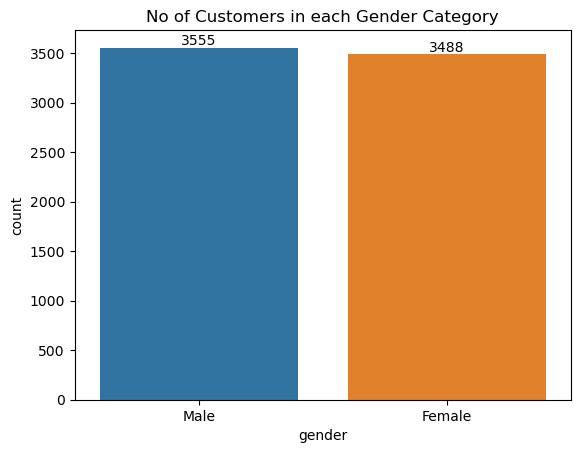

In [21]:
# How many customers belong to each gender spec
ax = sns.countplot(x=df["gender"],  order= df["gender"].value_counts(ascending=False).index)
values = df["gender"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title("No of Customers in each Gender Category");

> The male customers are more than the female customers but the margin is not big

In [22]:
# To effectively visualize the tenure attribute, we will place them in groups using the function below

def tenure_group(x):
    if x <= 15:
        return "<= 15 newbies"
    elif x <= 30:
        return "15-30 maturing"
    elif x <= 50:
        return "31-50 seasoned"
    else:
        return ">= 51 life-time"
    
# Apply the function to the data
df["Tenure_Groups"] = df["tenure"].apply(tenure_group)

# Checkout the result
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Groups
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 15 newbies
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,31-50 seasoned
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 15 newbies


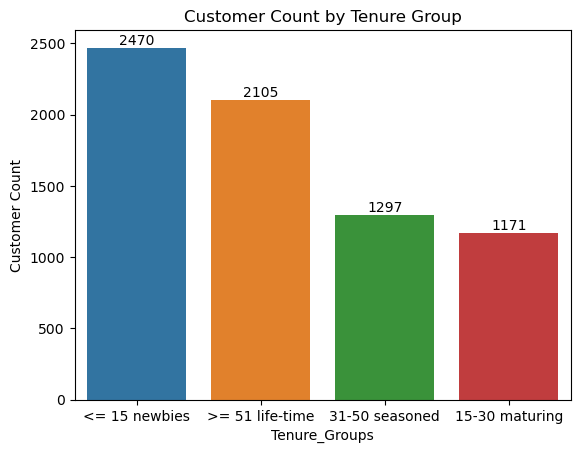

In [23]:
# How many customers belong to each Tenure_Groups
ax = sns.countplot(x=df["Tenure_Groups"],  order= df["Tenure_Groups"].value_counts(ascending=False).index)
values = df["Tenure_Groups"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.ylabel('Customer Count')
plt.title('Customer Count by Tenure Group');

>Customers in the `newbies` group are in the majority closely followed by the `life-time` customers. Both groups make up about 65% of the customer base. The `maturing` and `seasoned` customers are fewer and make up 35% of the customer base.

In [24]:
# Function to define SeniorCitizen category

def age_group(SeniorCitizen):
    if SeniorCitizen == 1:
        return 'Senior'
    else:
        return 'Youth'

df['Age_Group'] = df['SeniorCitizen'].apply(age_group)

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Groups,Age_Group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 15 newbies,Youth
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,31-50 seasoned,Youth
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 15 newbies,Youth


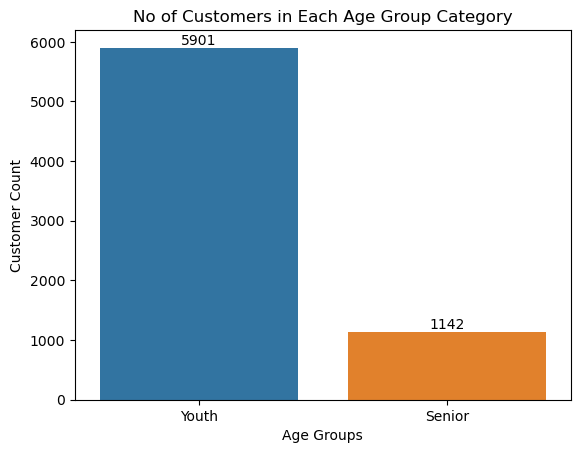

In [25]:
# How many customers belong to each Age Group
ax = sns.countplot(x=df["Age_Group"],  order= df["Age_Group"].value_counts(ascending=False).index)
values = df["Age_Group"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.xlabel('Age Groups')
plt.ylabel('Customer Count')
plt.title('No of Customers in Each Age Group Category');

> Customers in the `Youth` category far outnumber the `Seniors` making up about 84% of the customer base.

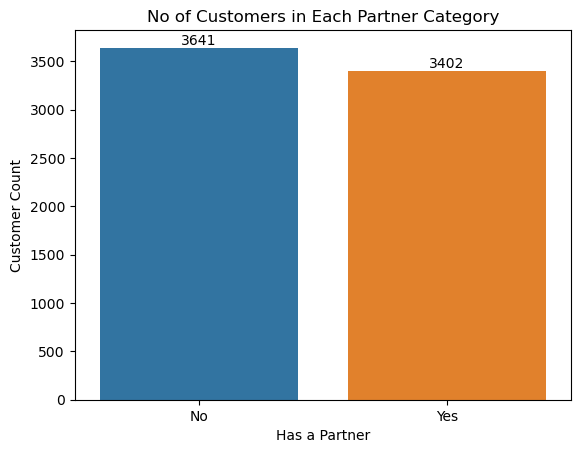

In [26]:
# How many customers belong to each Partner Category
ax = sns.countplot(x=df["Partner"],  order= df["Partner"].value_counts(ascending=False).index)
values = df["Partner"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.xlabel('Has a Partner')
plt.ylabel('Customer Count')
plt.title('No of Customers in Each Partner Category');

> We have more customers that are without a partner compared to the customers with partners. The difference however is not very large, it is 239.

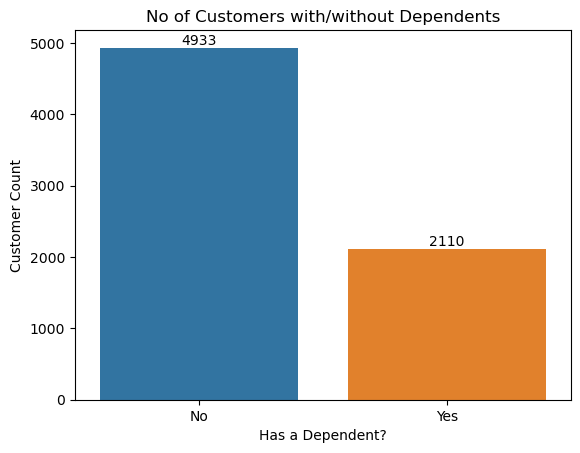

In [27]:
# How many customers belong to each Dependents category
ax = sns.countplot(x=df["Dependents"],  order= df["Dependents"].value_counts(ascending=False).index)
values = df["Dependents"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.xlabel('Has a Dependent?')
plt.ylabel('Customer Count')
plt.title('No of Customers with/without Dependents');

> 4933 customers do not have a dependent. This represents over 70% of the customers when compared with 2110 customers that have a dependent.

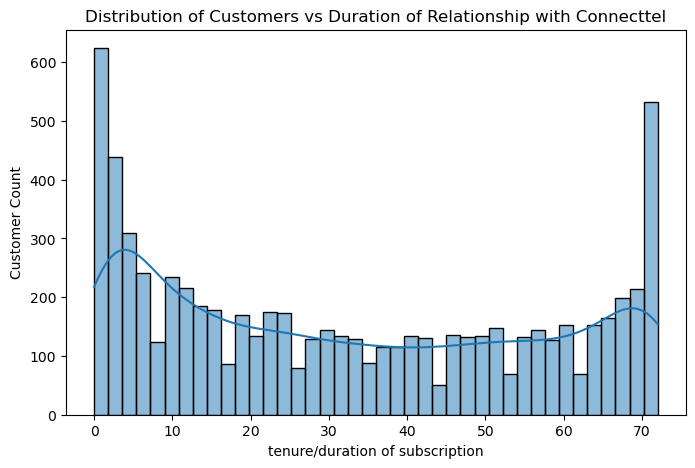

In [28]:
# Visualizing the distribution of the customers' duration of their subscription to the telecoms service 
plt.figure(figsize = (8,5))
sns.histplot(df['tenure'], kde=True, bins=40)
plt.xlabel('tenure/duration of subscription')
plt.ylabel('Customer Count')
plt.title('Distribution of Customers vs Duration of Relationship with Connecttel')
plt.show()

> The chart shows that more customers can be found in the less than 5 duration and also in the more than 70 tenure.

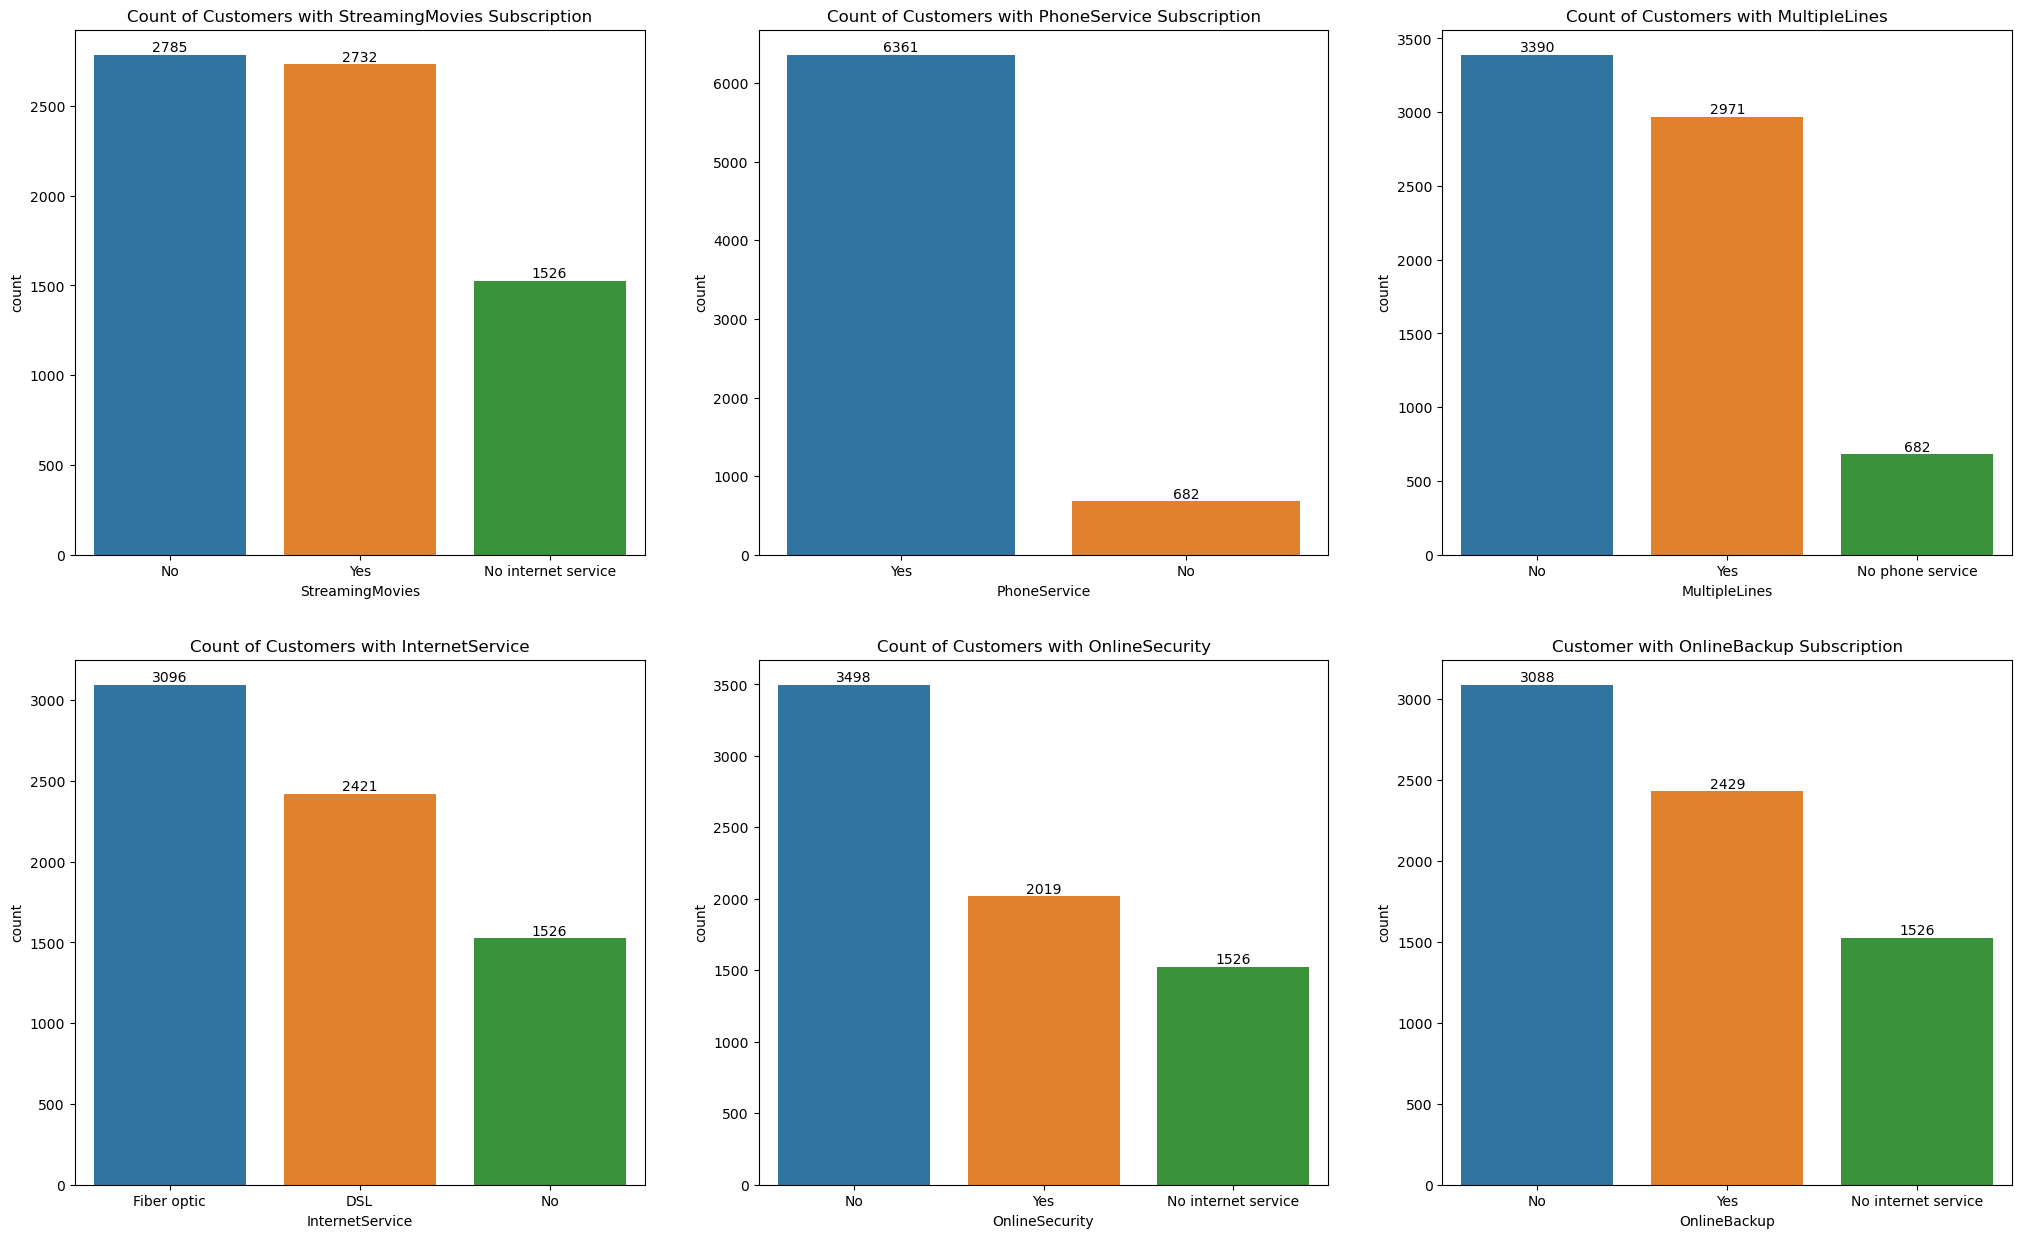

In [29]:
#Carrying out further Analysis of categorical features using subplot to workout the visualizations

f, axs =plt.subplots(2,3, figsize=(25,15))

ax = sns.countplot(x=df["StreamingMovies"],  order= df["StreamingMovies"].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title("Count of Customers with StreamingMovies Subscription")
values = df["StreamingMovies"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["PhoneService"],  order= df["PhoneService"].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title("Count of Customers with PhoneService Subscription")
values = df["PhoneService"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["MultipleLines"],  order= df["MultipleLines"].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title("Count of Customers with MultipleLines")
values = df["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["InternetService"],  order= df["InternetService"].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title("Count of Customers with InternetService")
values = df["InternetService"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["OnlineSecurity"],  order= df["OnlineSecurity"].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title("Count of Customers with OnlineSecurity")
values = df["OnlineSecurity"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["OnlineBackup"],  order= df["OnlineBackup"].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title("Customer with OnlineBackup Subscription")
values = df["OnlineBackup"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values);

> 1526 of the customers do not have internet service. This is over 21% of the customer base.

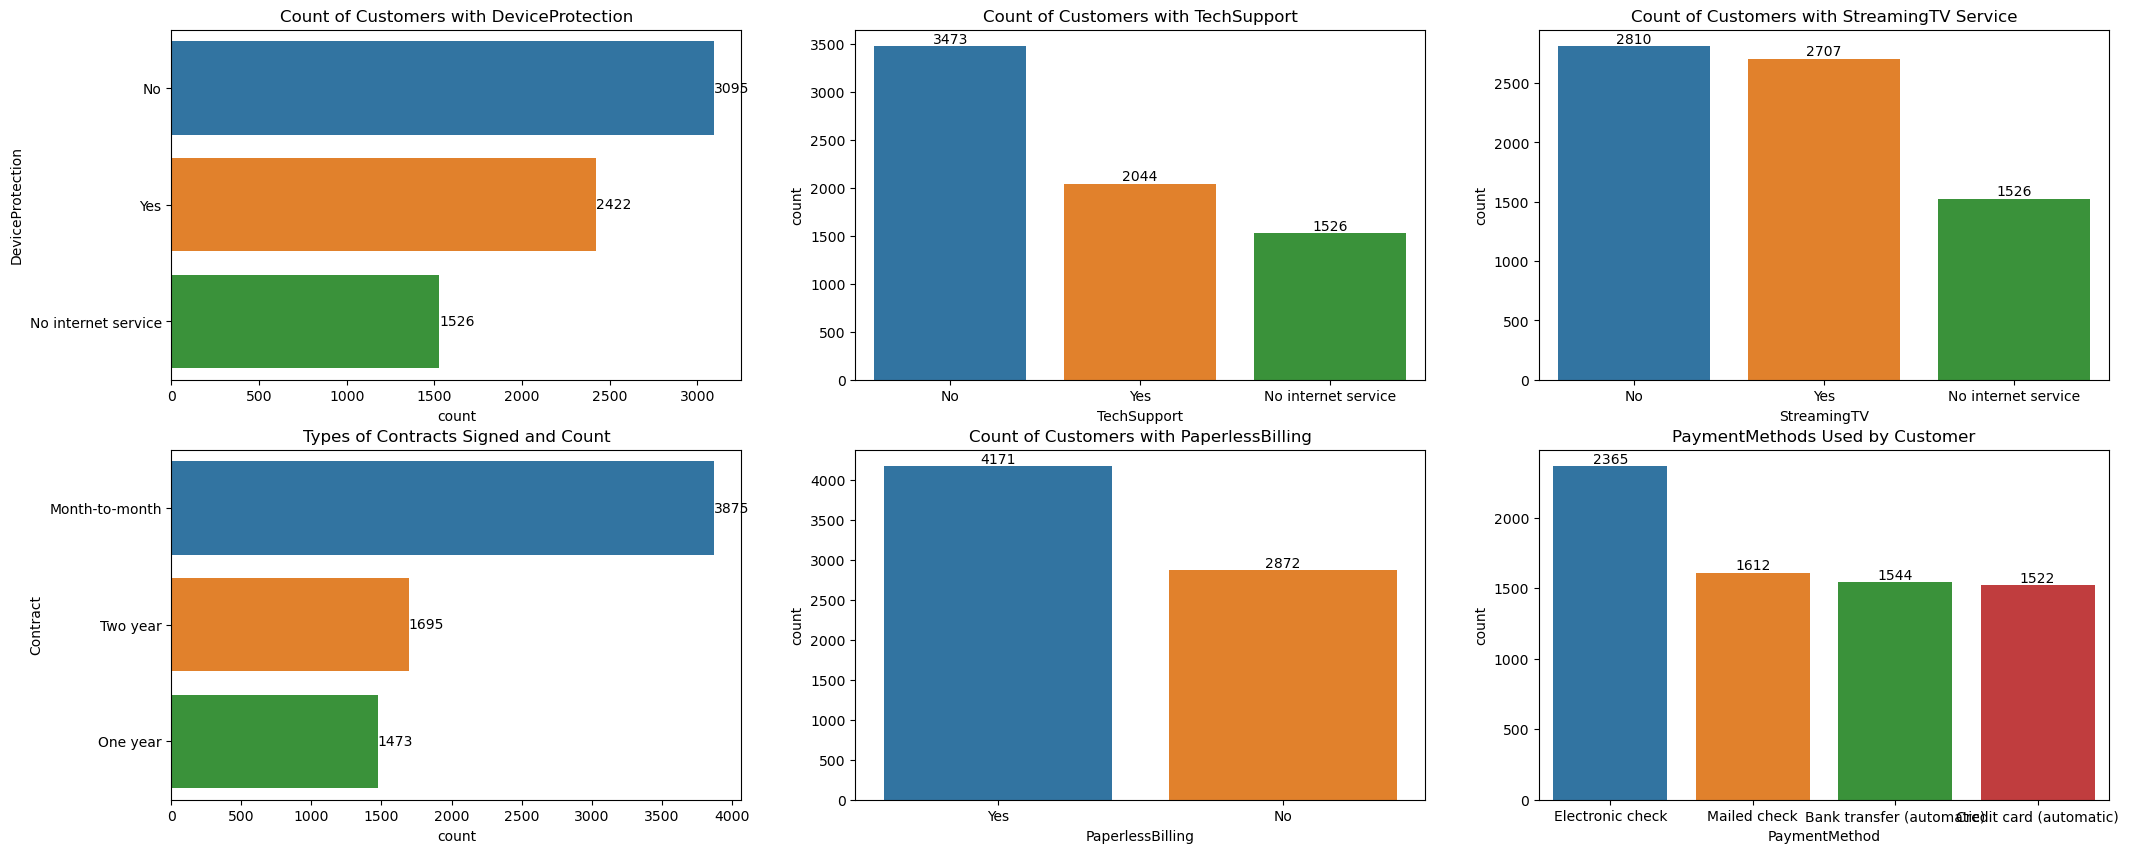

In [30]:
#
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

ax = sns.countplot(y=df["DeviceProtection"],  order= df["DeviceProtection"].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title("Count of Customers with DeviceProtection")
values = df["DeviceProtection"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["TechSupport"],  order= df["TechSupport"].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title("Count of Customers with TechSupport")
values = df["TechSupport"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)

ax = sns.countplot(x=df["StreamingTV"],  order= df["StreamingTV"].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title("Count of Customers with StreamingTV Service")
values = df["StreamingTV"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values);

ax = sns.countplot(y=df["Contract"],  order= df["Contract"].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title("Types of Contracts Signed and Count")
values = df["Contract"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values);

ax = sns.countplot(x=df["PaperlessBilling"],  order= df["PaperlessBilling"].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title("Count of Customers with PaperlessBilling")
values = df["PaperlessBilling"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values);

ax = sns.countplot(x=df["PaymentMethod"],  order= df["PaymentMethod"].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title("PaymentMethods Used by Customer")
values = df["PaymentMethod"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values);

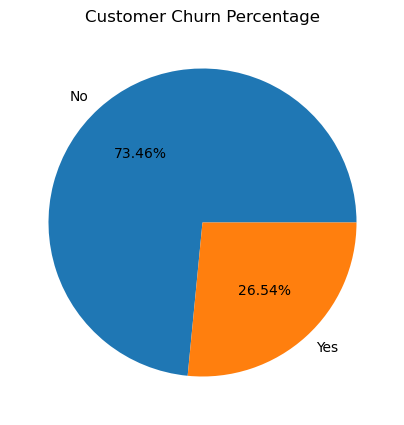

In [31]:
#Evaluating Customer Churn percentage 
from collections import Counter      # For Counting

fig,ax = plt.subplots(figsize=(5,5)) 
count = Counter(df["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Customer Churn Percentage");

>We can see from the data that close to 27% of the customers cancelled the Connecttel communications service they previously enjoyed.

### Numerical Data Analysis

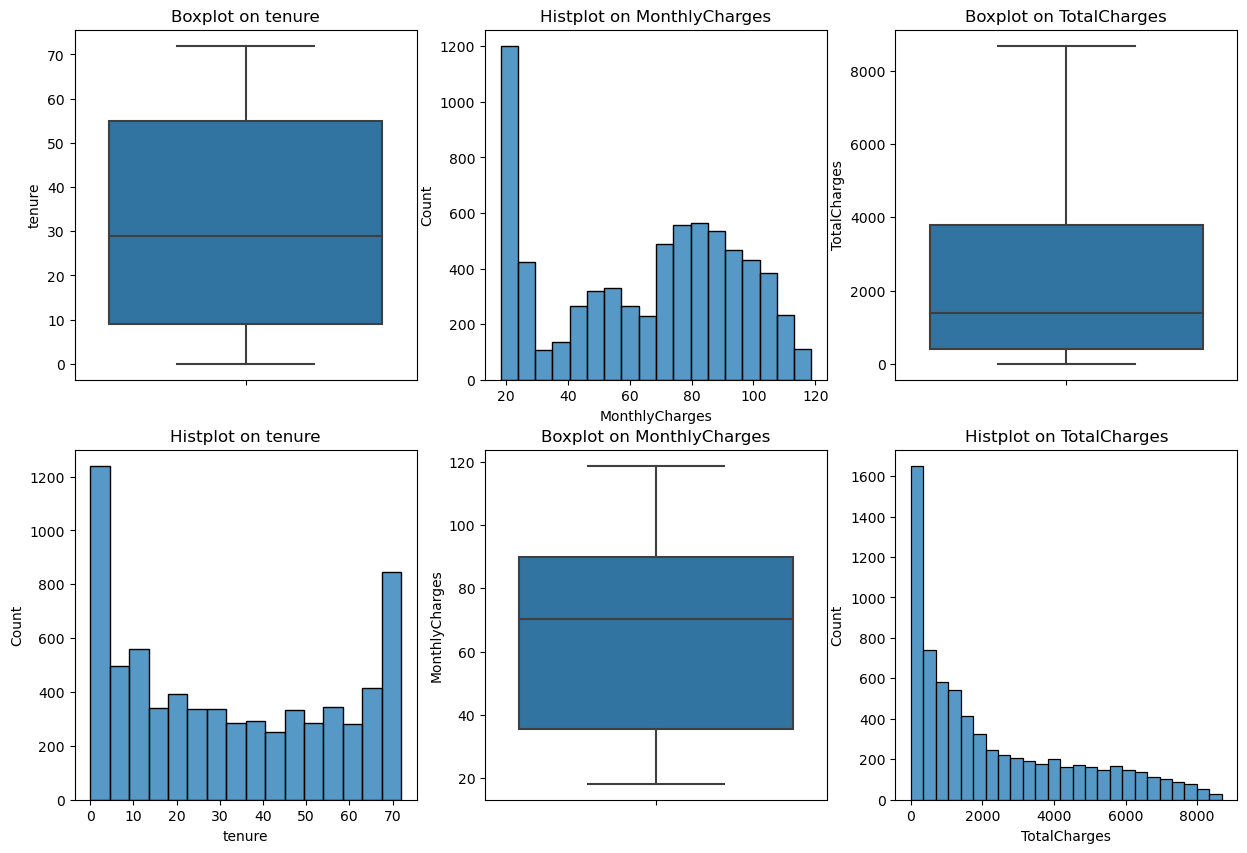

In [32]:
# Quantity, Cost, Revenue and Profit using Subplots

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sns.boxplot(y="tenure", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on tenure")

sns.histplot(x="MonthlyCharges", data=df, ax=axs[0,1])
axs[0,1].set_title("Histplot on MonthlyCharges")

sns.boxplot(y="TotalCharges", data=df, ax=axs[0,2])
axs[0,2].set_title("Boxplot on TotalCharges")

sns.histplot(x="tenure", data=df, ax=axs[1,0])
axs[1,0].set_title("Histplot on tenure")

sns.boxplot(y="MonthlyCharges", data=df, ax=axs[1,1])
axs[1,1].set_title("Boxplot on MonthlyCharges")

sns.histplot(x="TotalCharges", data=df, ax=axs[1,2])
axs[1,2].set_title("Histplot on TotalCharges")

plt.show()

> The analysis of the numerical variables (`tenure`, `MonthlyCharges`, `TotalCharges`) indicate that there is no outliers in the data. Also more than half of the customerbase paid less than 2000 in total charges so far and about 50% of the customers pay 70 in monthly charges.

#### Bivariate Analysis

This involves analysing the relationship between two variables.

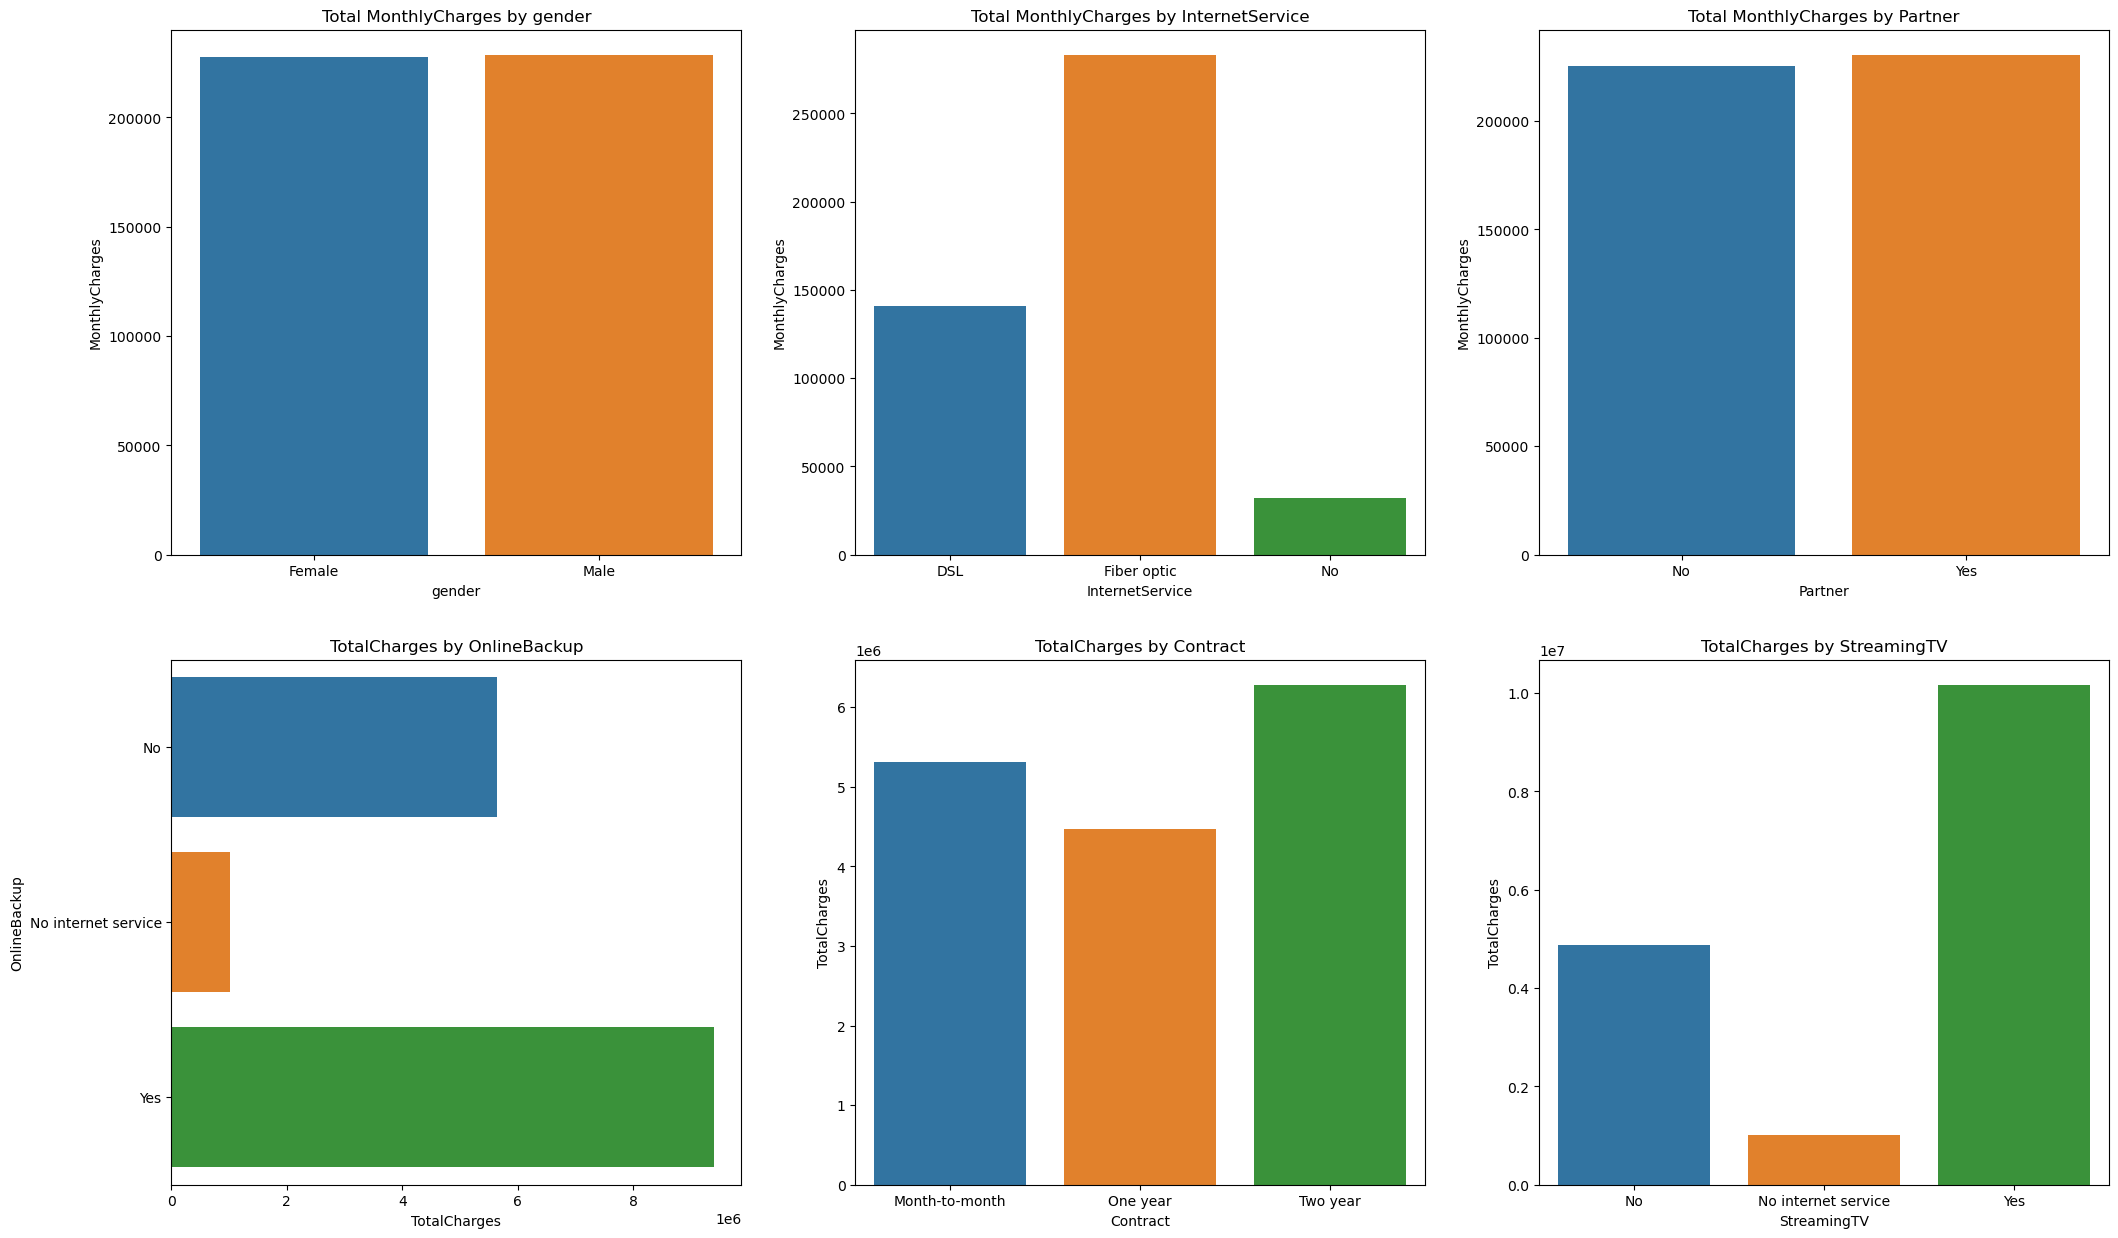

In [33]:
#Categorical bivariate analysis using subplot to workout the visualizations
f, ax =plt.subplots(2,3, figsize=(25,15))

gendr_monthly = df.groupby("gender")['MonthlyCharges'].sum().reset_index()
sns.barplot(x="gender", data=gendr_monthly, y="MonthlyCharges", ax=ax[0,0])
ax[0,0].set_title("Total MonthlyCharges by gender")

int_monthly = df.groupby("InternetService")['MonthlyCharges'].sum().reset_index()
sns.barplot(x="InternetService", data=int_monthly, y="MonthlyCharges", ax=ax[0,1])
ax[0,1].set_title("Total MonthlyCharges by InternetService")

partnr_monthly = df.groupby("Partner")['MonthlyCharges'].sum().reset_index()
sns.barplot(x="Partner", data=partnr_monthly, y="MonthlyCharges", ax=ax[0,2])
ax[0,2].set_title("Total MonthlyCharges by Partner")

onl_total = df.groupby("OnlineBackup")['TotalCharges'].sum().reset_index()
sns.barplot(y="OnlineBackup", data=onl_total, x="TotalCharges", ax=ax[1,0])
ax[1,0].set_title("TotalCharges by OnlineBackup")

contr_total = df.groupby("Contract")['TotalCharges'].sum().reset_index()
sns.barplot(x="Contract", data=contr_total, y="TotalCharges", ax=ax[1,1])
ax[1,1].set_title("TotalCharges by Contract")

strmTV_total = df.groupby("StreamingTV")['TotalCharges'].sum().reset_index()
sns.barplot(x="StreamingTV", data=strmTV_total, y="TotalCharges", ax=ax[1,2])
ax[1,2].set_title("TotalCharges by StreamingTV");

> - Males and female customers have paid almost the same amount of monthly charges  
> - Fiber optic is the preferred mode of internet service
> - The monthly charges paid by customers with partners is almost the same as that paid by customers without partners
> - Customers with onlinebackup service pay more in total charges
> - Similarly, customers with two year contracts have paid more in total charges, followed by month-to-month contract holders while one-year contracts have brought in the least so far
> - The streaming TV service has raked in almost twice in total charges when compared with inflow from customers without the service

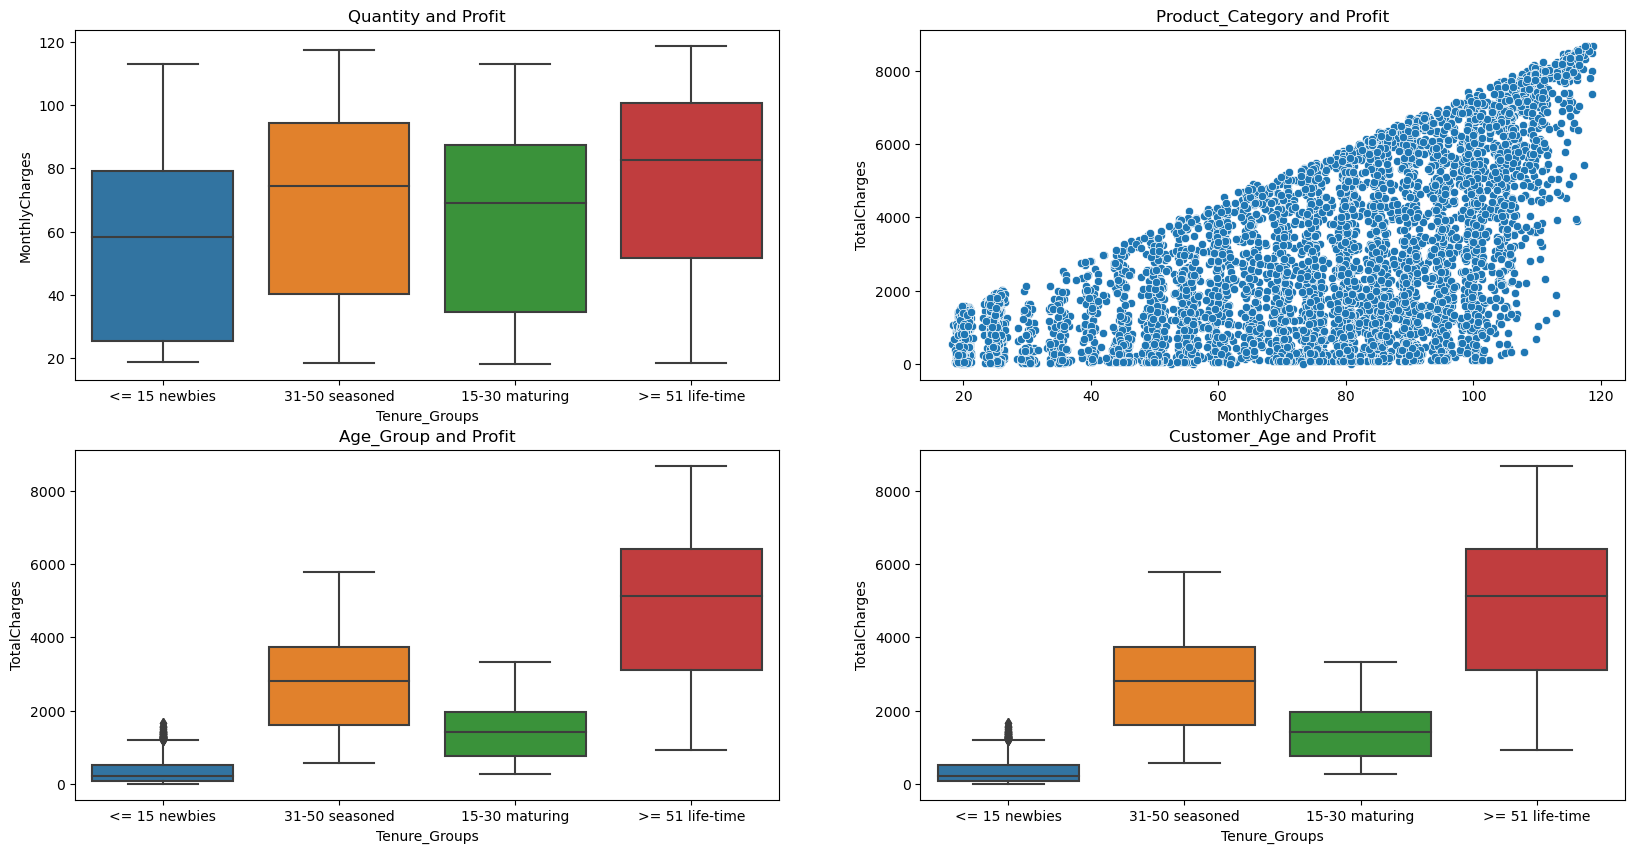

In [34]:
#Numerical bivariate analysis using subplot to workout the visualizations

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.boxplot(x='Tenure_Groups', y='MonthlyCharges' , data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit" )

sns.scatterplot(x='MonthlyCharges', y='TotalCharges' , data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit" )

sns.boxplot(x='Tenure_Groups', y='TotalCharges' , data=df, ax=axs[1,0])
axs[1,0].set_title("Age_Group and Profit" )

sns.boxplot(x='Tenure_Groups', y='TotalCharges' , data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit" );


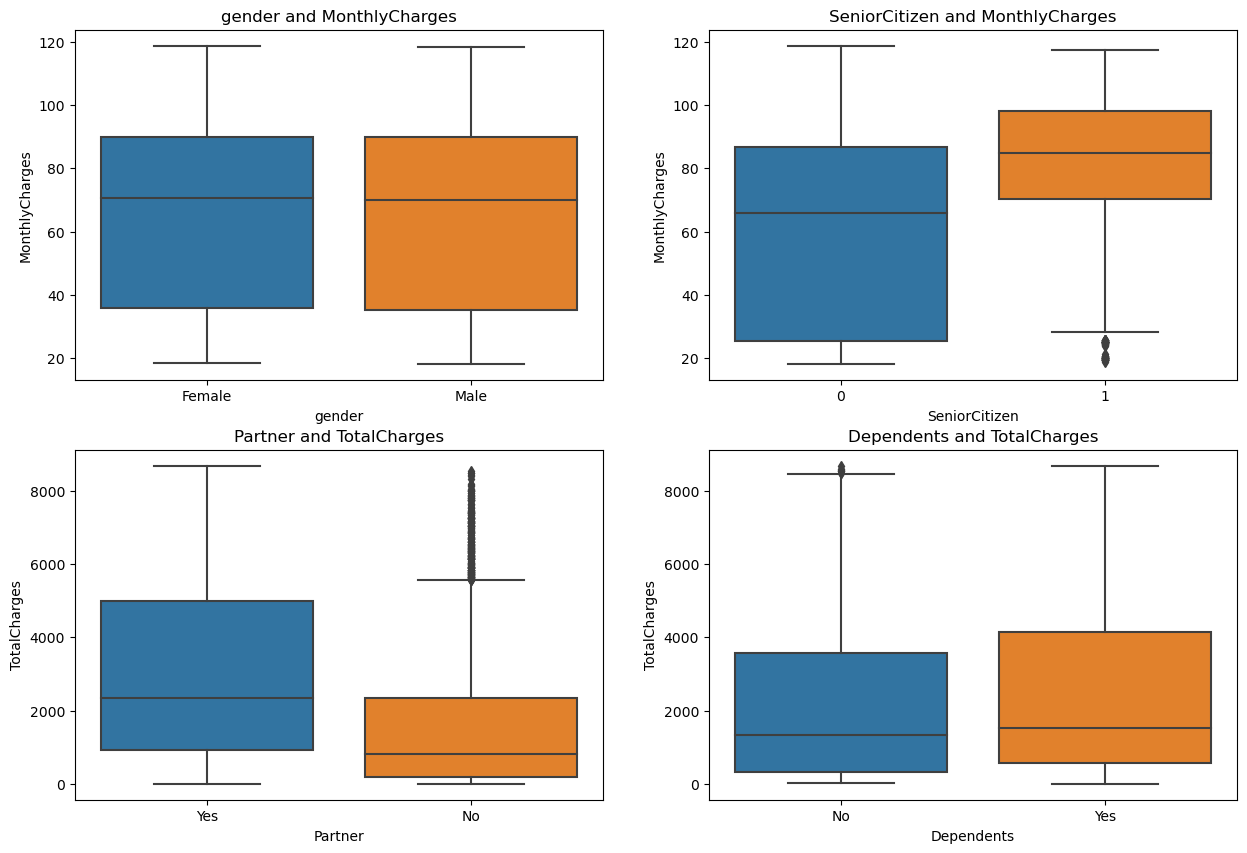

In [35]:
# Numerical columns Analysis


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x='gender', y='MonthlyCharges' , data=df, ax=axs[0,0])
axs[0,0].set_title("gender and MonthlyCharges" )

sns.boxplot(x='SeniorCitizen', y='MonthlyCharges' , data=df, ax=axs[0,1])
axs[0,1].set_title("SeniorCitizen and MonthlyCharges" )

sns.boxplot(x='Partner', y='TotalCharges' , data=df, ax=axs[1,0])
axs[1,0].set_title("Partner and TotalCharges" )

sns.boxplot(x='Dependents', y='TotalCharges' , data=df, ax=axs[1,1])
axs[1,1].set_title("Dependents and TotalCharges" );


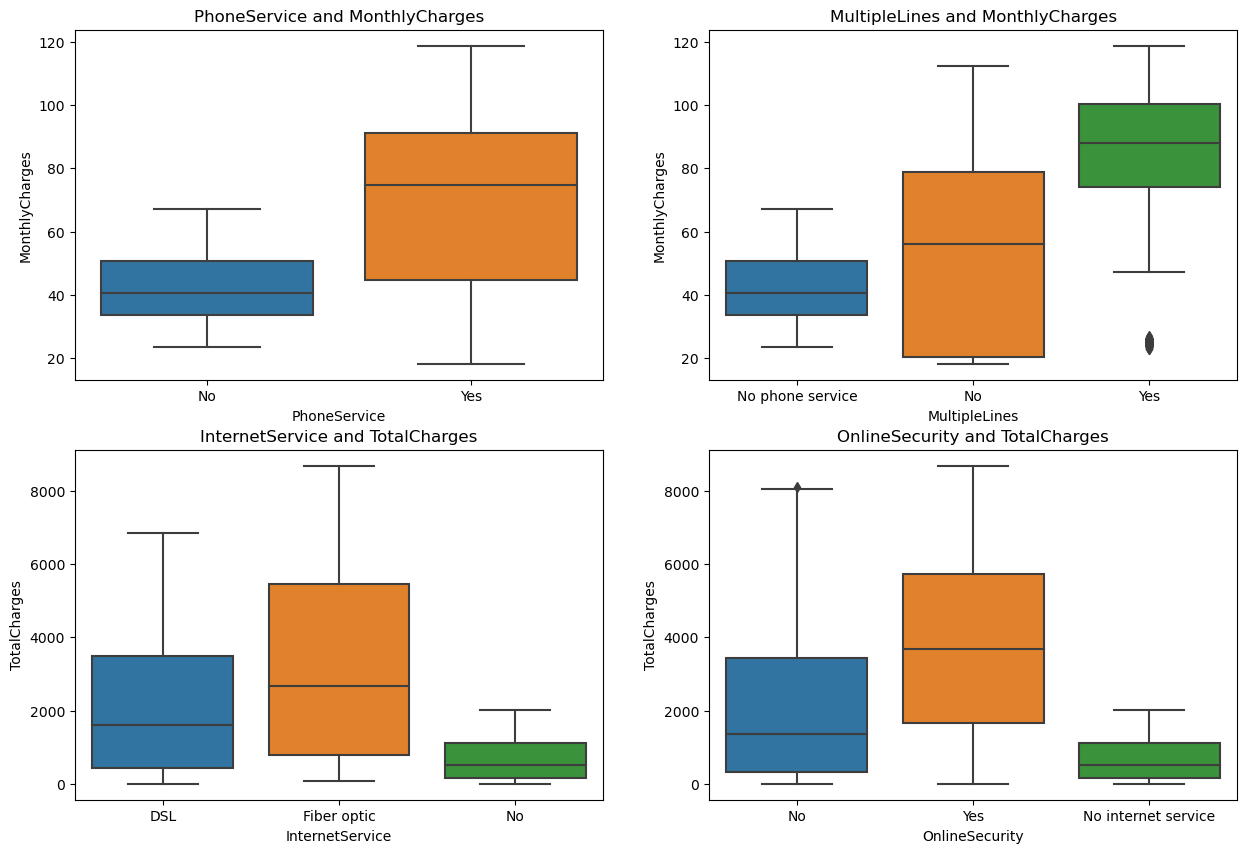

In [36]:
# Numerical columns Analysis


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x='PhoneService', y='MonthlyCharges' , data=df, ax=axs[0,0])
axs[0,0].set_title("PhoneService and MonthlyCharges" )

sns.boxplot(x='MultipleLines', y='MonthlyCharges' , data=df, ax=axs[0,1])
axs[0,1].set_title("MultipleLines and MonthlyCharges" )

sns.boxplot(x='InternetService', y='TotalCharges' , data=df, ax=axs[1,0])
axs[1,0].set_title("InternetService and TotalCharges" )

sns.boxplot(x='OnlineSecurity', y='TotalCharges' , data=df, ax=axs[1,1])
axs[1,1].set_title("OnlineSecurity and TotalCharges" );


In [37]:
# churn relationships

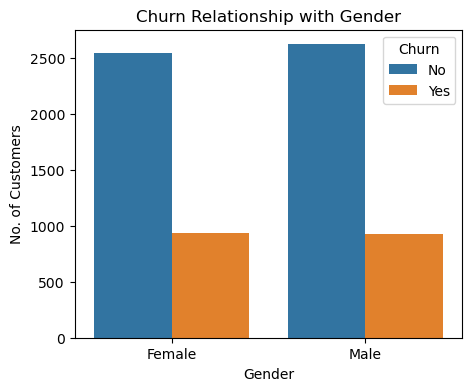

In [38]:
# Exploring the relationship between Churn and gender
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["gender"], hue = df['Churn'])
plt.xlabel('Gender')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with Gender');

> The churn across male and female groups is in equal proportions.

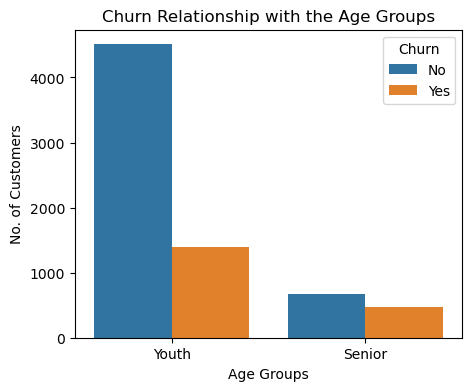

In [39]:
# Exploring the relationship between Churn and the Age Grades
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["Age_Group"], hue=df['Churn'] )
plt.xlabel('Age Groups')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with the Age Groups');

> The number customers in the youth category that are affected by the churn effect is more than double those in the senior citizens category

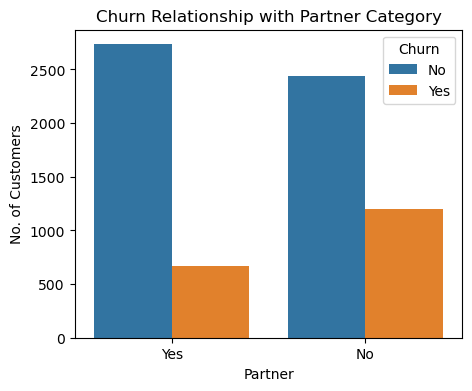

In [40]:
# Exploring the relationship between Churn and Partner variable
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["Partner"], hue=df['Churn'] )
plt.xlabel('Partner')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with Partner Category');

>The churn figure for customers without partners is almost twice that of customers with partners

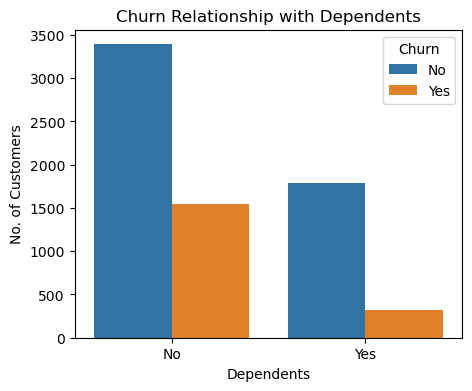

In [41]:
# Exploring the relationship between Churn and Dependents variable
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["Dependents"], hue=df['Churn'] )
plt.xlabel('Dependents')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with Dependents');

>The churn figure for customers without dependents is more than thrice that of customers with partners

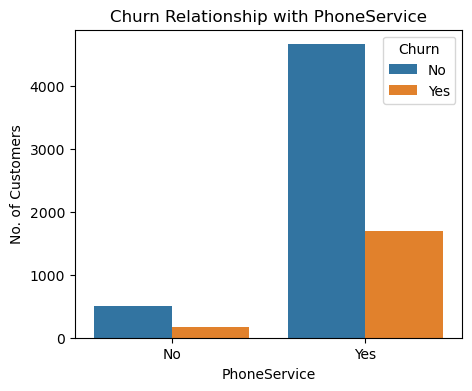

In [42]:
# Exploring the relationship between Churn and PhoneService variable
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["PhoneService"], hue=df['Churn'] )
plt.xlabel('PhoneService')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with PhoneService');

>The number of customers with phoneservice that experienced churn far exceeds the number of customers without churn by ratio 6:1

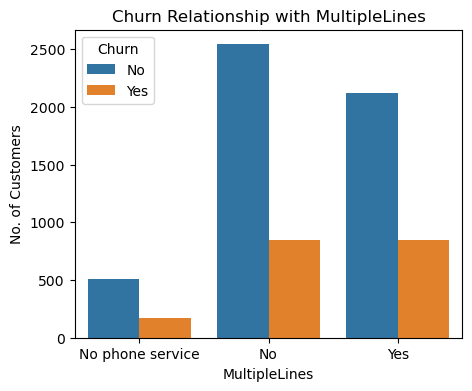

In [43]:
# Exploring the relationship between Churn and MultipleLines attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["MultipleLines"], hue=df['Churn'] )
plt.xlabel('MultipleLines')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with MultipleLines');

> The number of customers with multiple lines that was affected by churn is almost the same as customers without multiple lines and far outnumbered the churn figures for customers without a phone service.

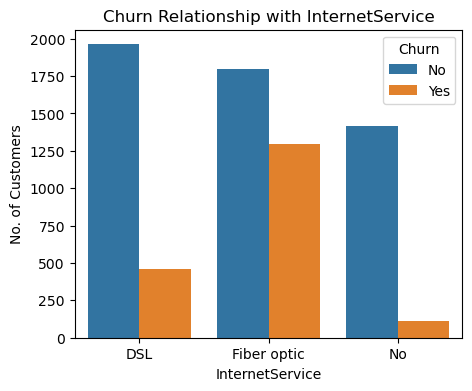

In [44]:
# Exploring the relationship between Churn and InternetService attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["InternetService"], hue=df['Churn'] )
plt.xlabel('InternetService')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with InternetService');

> A very high number of customers enjoying fiber optic internet service abandoned the relationship when compared with customers with DSL subscription a only a minimal number of customers without internet service left the relationship. This indicates a high dissactisfaction rate from customers with fiber optic internet service.

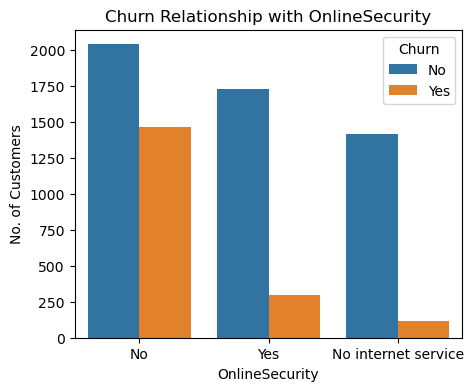

In [45]:
# Exploring the relationship between Churn and OnlineSecurity attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["OnlineSecurity"], hue=df['Churn'] )
plt.xlabel('OnlineSecurity')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with OnlineSecurity');

> The trend here shows that a high number of customers that are without onlinesecurity abandoned the relationship.

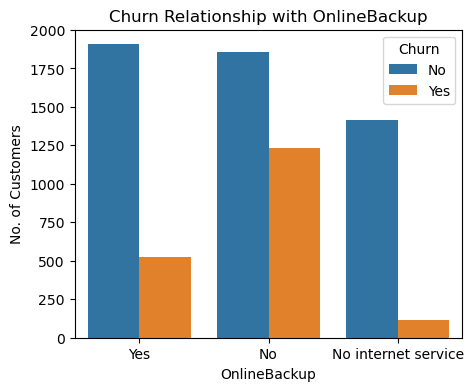

In [46]:
# Exploring the relationship between Churn and OnlineBackup attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["OnlineBackup"], hue=df['Churn'] )
plt.xlabel('OnlineBackup')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with OnlineBackup');

> The trend here shows that a high number of customers that are without online backuup abandoned the relationship when compared with the others.

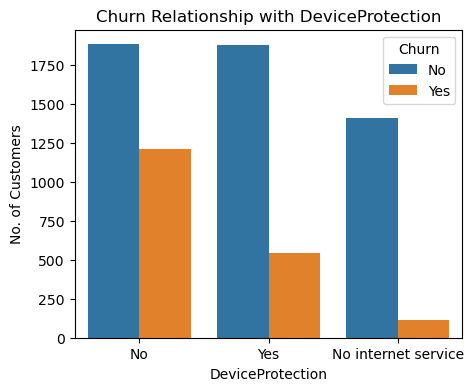

In [47]:
# Exploring the relationship between Churn and DeviceProtection attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["DeviceProtection"], hue=df['Churn'] )
plt.xlabel('DeviceProtection')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with DeviceProtection');

> The trend here also shows that more than 2 times the number of customers that are without device protection abandoned the relationship when compared with those that have device protection.

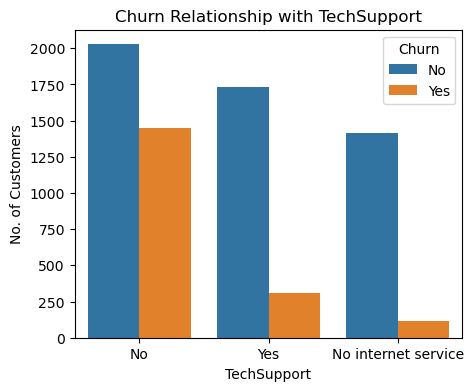

In [48]:
# Exploring the relationship between Churn and TechSupport attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["TechSupport"], hue=df['Churn'] )
plt.xlabel('TechSupport')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with TechSupport');

>A very high percentage of the customers that churned did not have techsupport

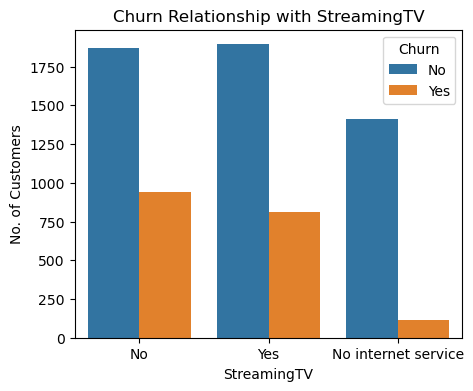

In [49]:
# Exploring the relationship between Churn and StreamingTV attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["StreamingTV"], hue=df['Churn'] )
plt.xlabel('StreamingTV')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with StreamingTV');

> About 900 customers that do not have the streamTV service churned and almost the same number of customers that enjoy the streamTV service also churned.

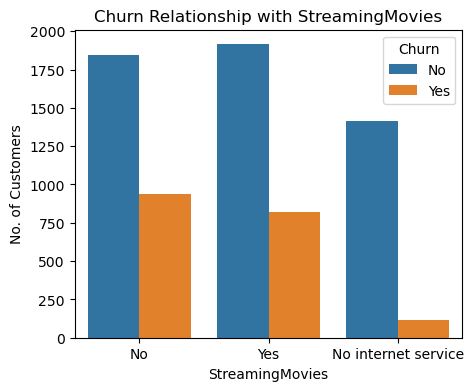

In [50]:
# Exploring the relationship between Churn and StreamingTV attribute
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["StreamingMovies"], hue=df['Churn'] )
plt.xlabel('StreamingMovies')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with StreamingMovies');

> The experience of the customers with StreamMovies service is similar to that of customers with StreamTV service.

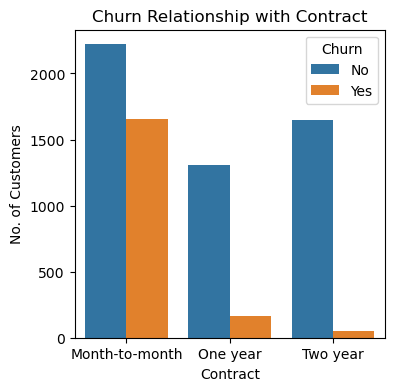

In [51]:
# Exploring the relationship between Churn and StreamingTV attribute
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df["Contract"], hue=df['Churn'] )
plt.xlabel('Contract')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with Contract');

> About 85% of the customers that churned are on the month-to-month contract relationship with Connecttel

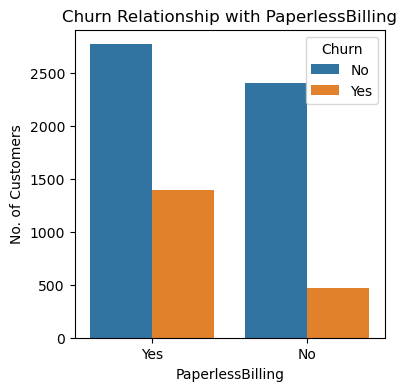

In [52]:
# Exploring the relationship between Churn and PaperlessBilling attribute
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df["PaperlessBilling"], hue=df['Churn'] )
plt.xlabel('PaperlessBilling')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with PaperlessBilling');

> In this scenario, more customers with paperless billing exited the telco's service compared with the number that exited and did not have the paperless service.

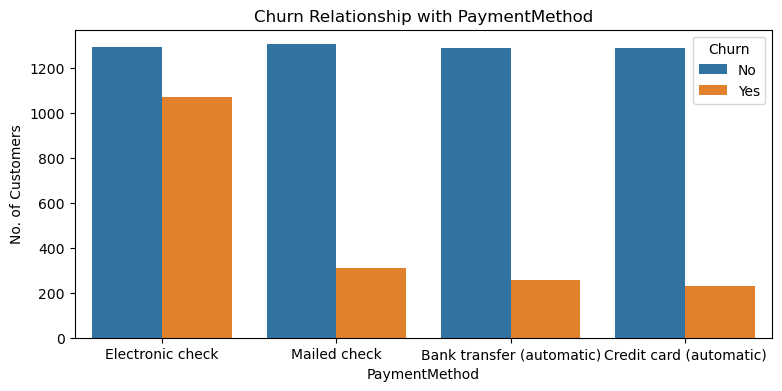

In [53]:
# Exploring the relationship between Churn and PaymentMethod attribute
plt.figure(figsize=(9,4))
ax = sns.countplot(x=df["PaymentMethod"], hue=df['Churn'] )
plt.xlabel('PaymentMethod')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with PaymentMethod');

> A higher number of customers that exited the relationship with Connecttel used the electronic check payment method.

In [54]:
# To effectively visualize the MonthlyCharges attribute, we will place them in groups using the function below

def monthly_pay(x):
    if x <= 30:
        return "<=30_bottom"
    elif x <= 55:
        return "band2"
    elif x <= 80:
        return "band3"
    elif x <= 100:
        return "band4"
    else:
        return "> 110.01_top_set"
    
# Apply the function to the data
df["MnthlyCharge_Groups"] = df["MonthlyCharges"].apply(monthly_pay)

# Checkout the result
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Groups,Age_Group,MnthlyCharge_Groups
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 15 newbies,Youth,<=30_bottom
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,31-50 seasoned,Youth,band3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 15 newbies,Youth,band2


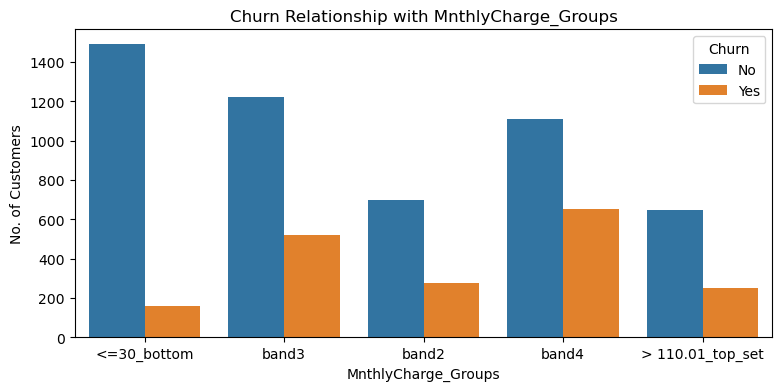

In [55]:
# Exploring the relationship between Churn and MnthlyCharge_Groups attribute
plt.figure(figsize=(9,4))
ax = sns.countplot(x=df["MnthlyCharge_Groups"], hue=df['Churn'] )
plt.xlabel('MnthlyCharge_Groups')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with MnthlyCharge_Groups');

> It's noted here that more of the churn numbers come from customers who at band3 and band4 groups of monthly charges payers.

In [56]:
# To effectively visualize the TotalCharges attribute, we will place them in groups using the function below

def ttlcharge(x):
    if x <= 1000:
        return "<= 1000nless"
    elif x <= 3000:
        return "under3k"
    elif x <= 5000:
        return "under5k"
    elif x <= 7000:
        return "under7k"
    else:
        return "> 7nAbove"
    
# Apply the function to the data
df["TotalCharge_Groups"] = df["TotalCharges"].apply(ttlcharge)

# Checkout the result
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Groups,Age_Group,MnthlyCharge_Groups,TotalCharge_Groups
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 15 newbies,Youth,<=30_bottom,<= 1000nless
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,31-50 seasoned,Youth,band3,under3k
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 15 newbies,Youth,band2,<= 1000nless


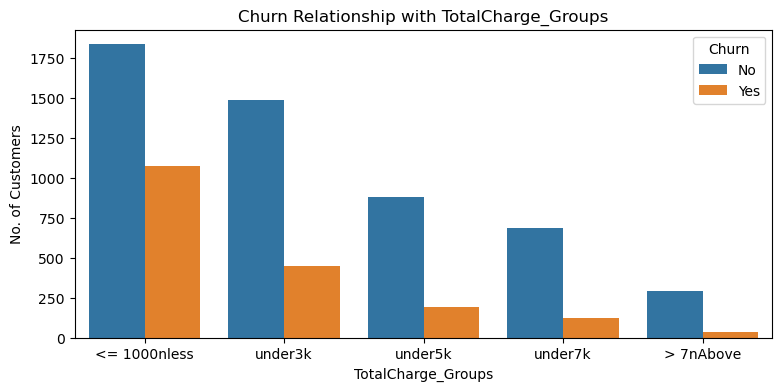

In [57]:
# Exploring the relationship between Churn and TotalCharge_Groups attribute
plt.figure(figsize=(9,4))
ax = sns.countplot(x=df["TotalCharge_Groups"], hue=df['Churn'] )
plt.xlabel('TotalCharge_Groups')
plt.ylabel('No. of Customers')
plt.title('Churn Relationship with TotalCharge_Groups');

> The majority of the customers that exited had paid total charges less than 3000 by the time of their exit

**Other bivariate analysis and visualizations**

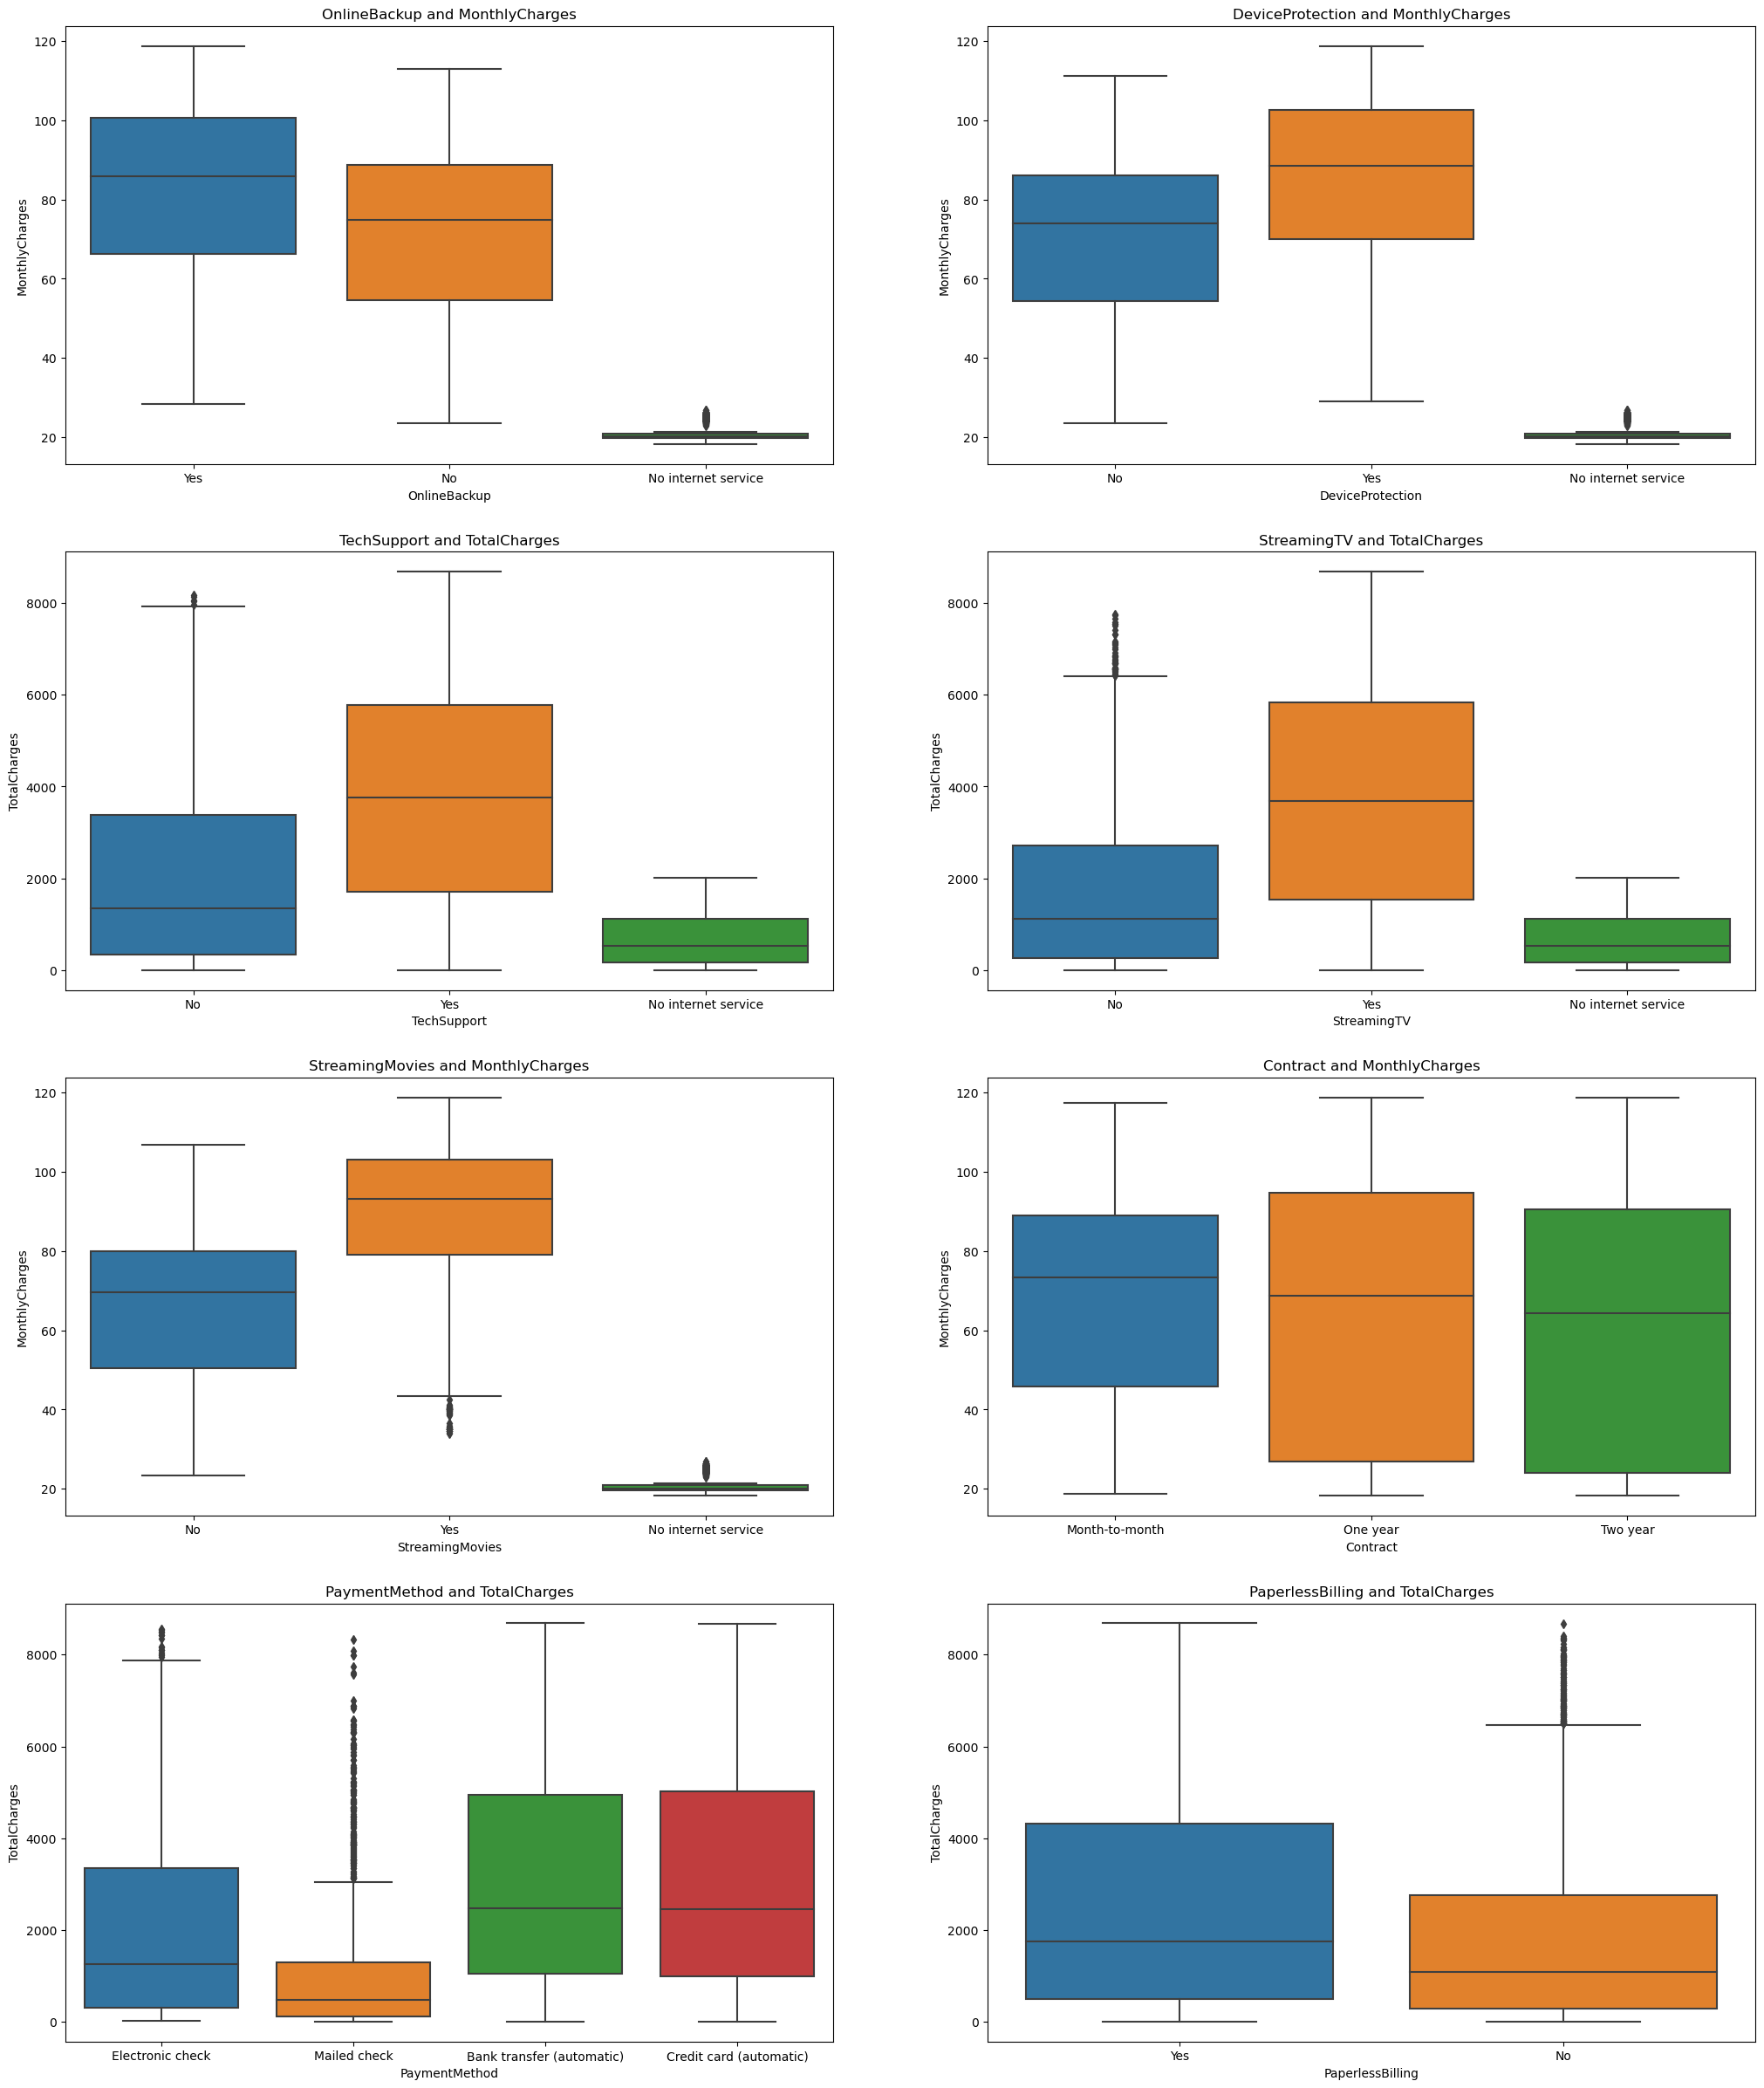

In [58]:
# Numerical columns Analysis


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(25,30))

sns.boxplot(x='OnlineBackup', y='MonthlyCharges' , data=df, ax=axs[0,0])
axs[0,0].set_title("OnlineBackup and MonthlyCharges" )

sns.boxplot(x='DeviceProtection', y='MonthlyCharges' , data=df, ax=axs[0,1])
axs[0,1].set_title("DeviceProtection and MonthlyCharges" )

sns.boxplot(x='TechSupport', y='TotalCharges' , data=df, ax=axs[1,0])
axs[1,0].set_title("TechSupport and TotalCharges" )

sns.boxplot(x='StreamingTV', y='TotalCharges' , data=df, ax=axs[1,1])
axs[1,1].set_title("StreamingTV and TotalCharges" );

sns.boxplot(x='StreamingMovies', y='MonthlyCharges' , data=df, ax=axs[2,0])
axs[2,0].set_title("StreamingMovies and MonthlyCharges" )

sns.boxplot(x='Contract', y='MonthlyCharges' , data=df, ax=axs[2,1])
axs[2,1].set_title("Contract and MonthlyCharges" )

sns.boxplot(x='PaymentMethod', y='TotalCharges' , data=df, ax=axs[3,0])
axs[3,0].set_title("PaymentMethod and TotalCharges" )

sns.boxplot(x='PaperlessBilling', y='TotalCharges' , data=df, ax=axs[3,1])
axs[3,1].set_title("PaperlessBilling and TotalCharges" );

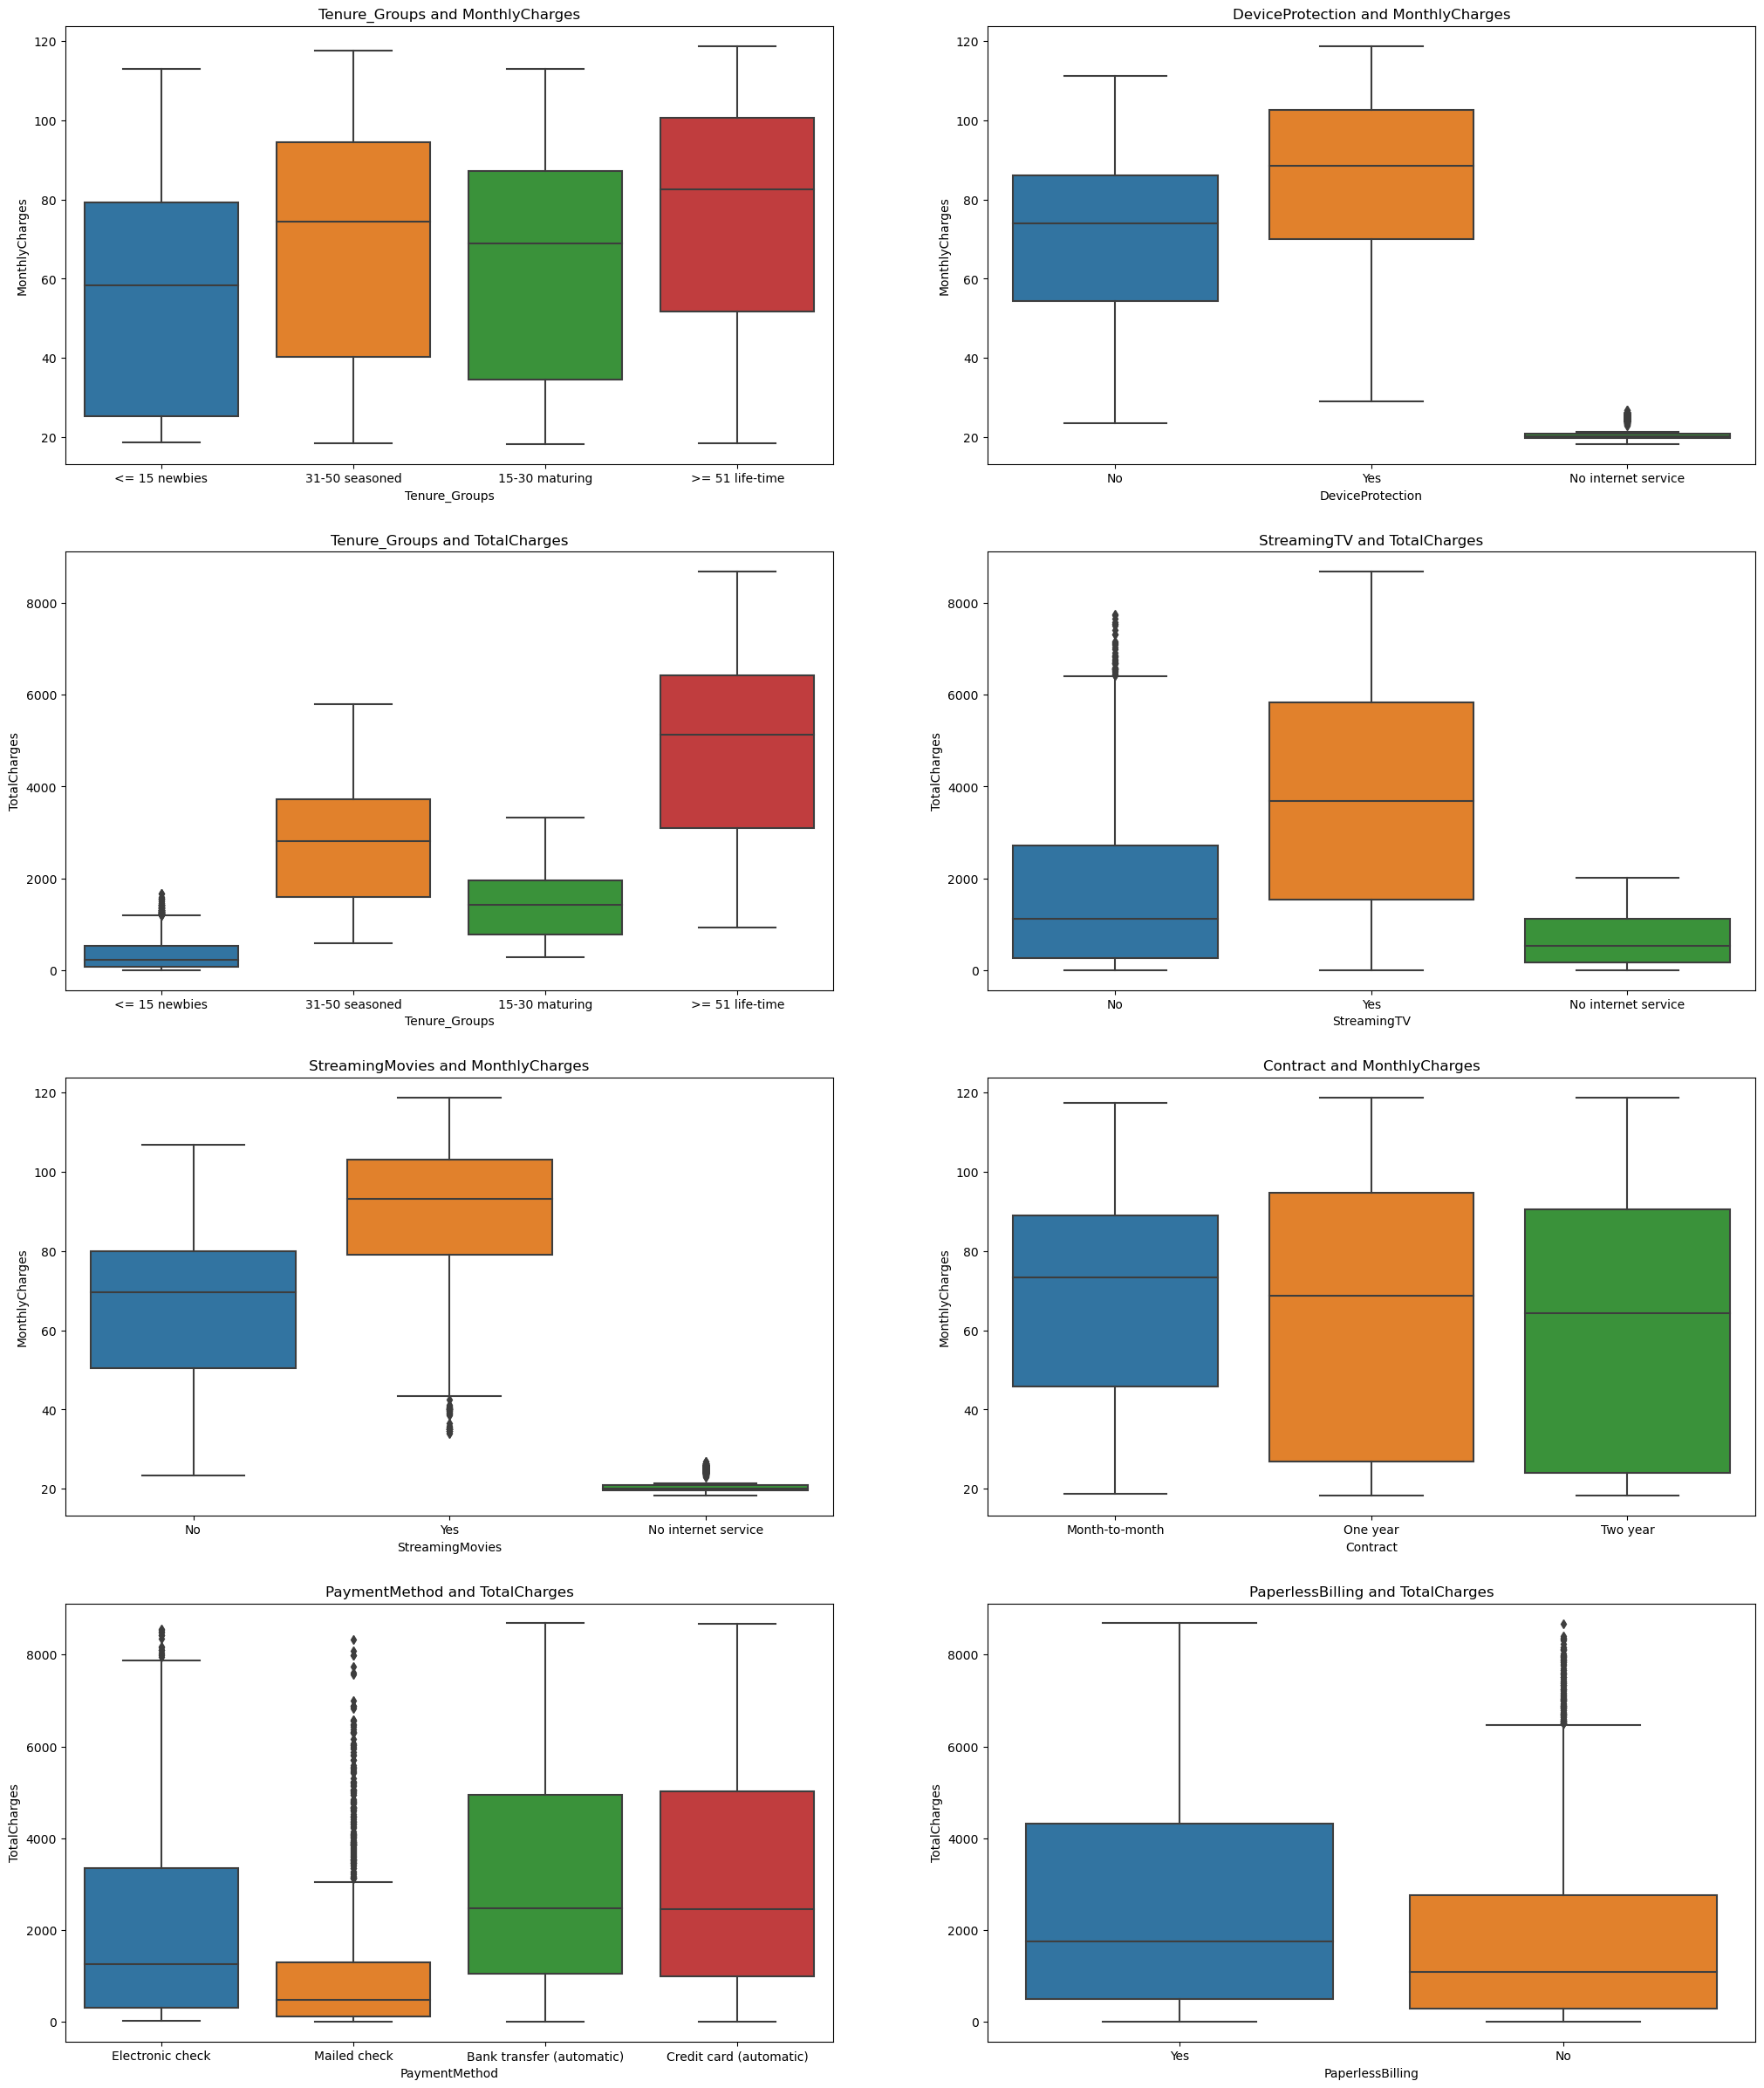

In [59]:
# Numerical columns Analysis


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(25,30))

sns.boxplot(x='Tenure_Groups', y='MonthlyCharges' , data=df, ax=axs[0,0])
axs[0,0].set_title("Tenure_Groups and MonthlyCharges" )

sns.boxplot(x='DeviceProtection', y='MonthlyCharges' , data=df, ax=axs[0,1])
axs[0,1].set_title("DeviceProtection and MonthlyCharges" )

sns.boxplot(x='Tenure_Groups', y='TotalCharges' , data=df, ax=axs[1,0])
axs[1,0].set_title("Tenure_Groups and TotalCharges" )

sns.boxplot(x='StreamingTV', y='TotalCharges' , data=df, ax=axs[1,1])
axs[1,1].set_title("StreamingTV and TotalCharges" );

sns.boxplot(x='StreamingMovies', y='MonthlyCharges' , data=df, ax=axs[2,0])
axs[2,0].set_title("StreamingMovies and MonthlyCharges" )

sns.boxplot(x='Contract', y='MonthlyCharges' , data=df, ax=axs[2,1])
axs[2,1].set_title("Contract and MonthlyCharges" )

sns.boxplot(x='PaymentMethod', y='TotalCharges' , data=df, ax=axs[3,0])
axs[3,0].set_title("PaymentMethod and TotalCharges" )

sns.boxplot(x='PaperlessBilling', y='TotalCharges' , data=df, ax=axs[3,1])
axs[3,1].set_title("PaperlessBilling and TotalCharges" );

### Multivariate Analysis



In [60]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


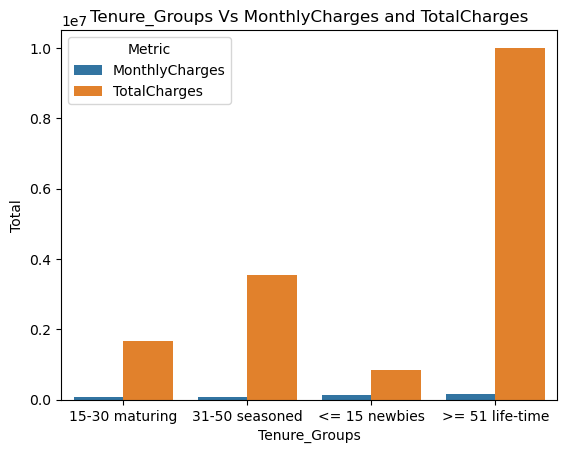

In [61]:
# Tenure_Groups against "MonthlyCharges","TotalCharges"

tenur_cat = df.groupby("Tenure_Groups")[["MonthlyCharges","TotalCharges"]].sum().reset_index()

procat = pd.melt(tenur_cat, id_vars="Tenure_Groups", var_name= "Metric", value_name= "Total")
sns.barplot(x="Tenure_Groups", y="Total", data=procat , hue="Metric")
plt.title("Tenure_Groups Vs MonthlyCharges and TotalCharges");

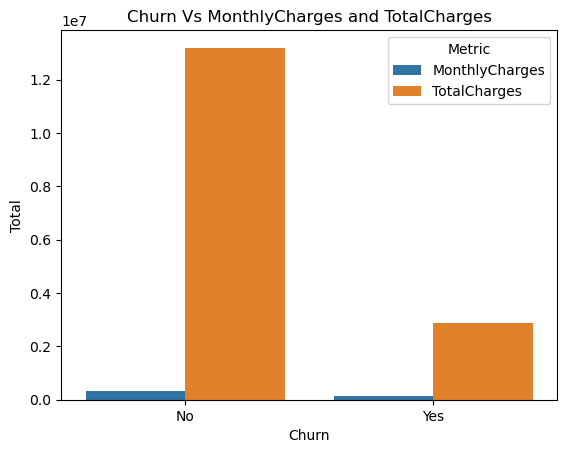

In [62]:
# Churn against "MonthlyCharges","TotalCharges"

tenur_cat = df.groupby("Churn")[["MonthlyCharges","TotalCharges"]].sum().reset_index()

procat = pd.melt(tenur_cat, id_vars="Churn", var_name= "Metric", value_name= "Total")
sns.barplot(x="Churn", y="Total", data=procat , hue="Metric")
plt.title("Churn Vs MonthlyCharges and TotalCharges");
#tenur_cat

In [63]:
z = df[df['Churn']=='Yes']

In [64]:
z.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_Groups', 'Age_Group',
       'MnthlyCharge_Groups', 'TotalCharge_Groups'],
      dtype='object')

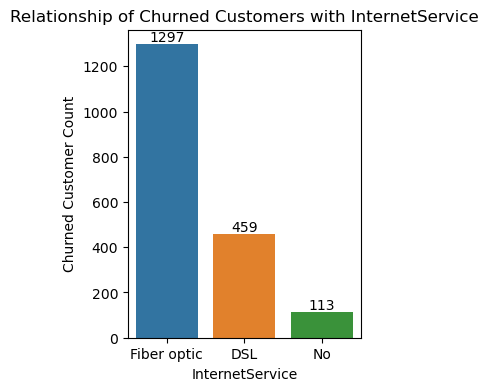

In [72]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x=z["InternetService"],  order= z["InternetService"].value_counts(ascending=False).index)
ax.set_title("Relationship of Churned Customers with InternetService")
values = z["InternetService"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.ylabel("Churned Customer Count");

<Axes: xlabel='Tenure_Groups', ylabel='MonthlyCharges'>

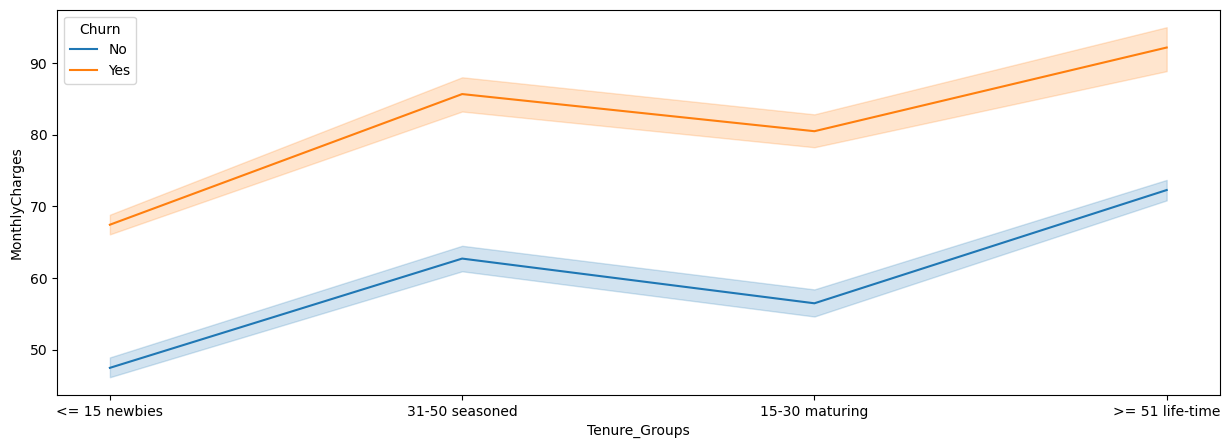

In [63]:
# Look at MonthlyCharges on Tenure_Groups and Churn, 

plt.figure(figsize=(15,5))
sns.lineplot(x="Tenure_Groups", y="MonthlyCharges", data=df, hue="Churn" )

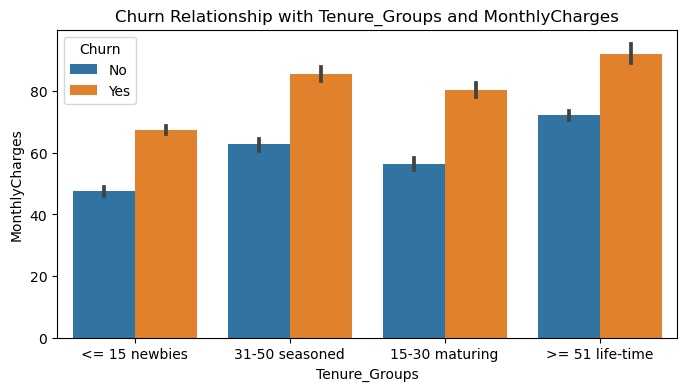

In [64]:
# Exploring the relationship between Churn against the duo of MonthlyCharges and Tenure Groups
plt.figure(figsize=(8,4))
sns.barplot(x="Tenure_Groups", y="MonthlyCharges", data=df, hue="Churn" )
plt.xlabel('Tenure_Groups')
plt.ylabel('MonthlyCharges')
plt.title('Churn Relationship with Tenure_Groups and MonthlyCharges');

> Some of the customers that exited were billed to pay higher monthly charges across all the tenure groups

<Axes: xlabel='Tenure_Groups', ylabel='TotalCharges'>

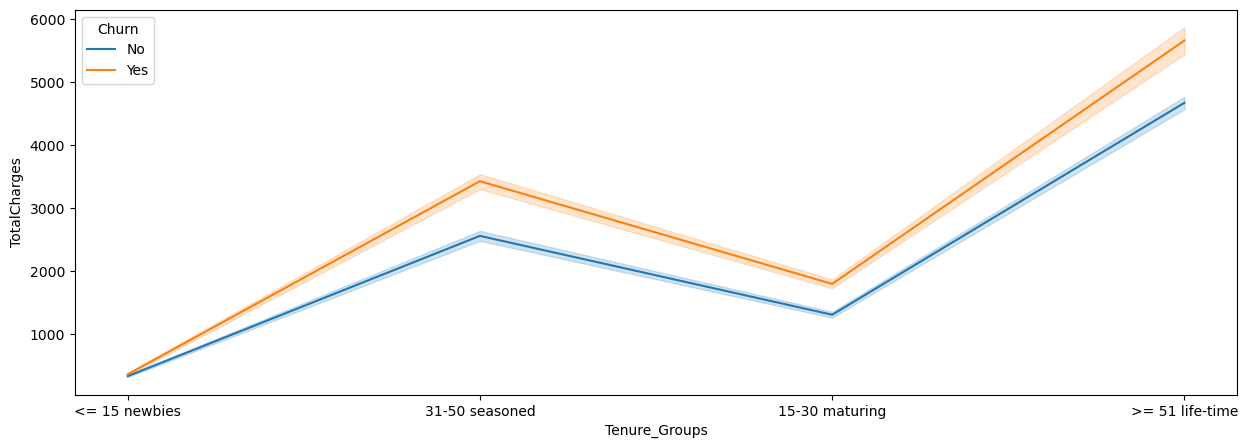

In [65]:
# Look at TotalCharges on Tenure_Groups and Churn, 

plt.figure(figsize=(15,5))
sns.lineplot(x="Tenure_Groups", y="TotalCharges", data=df, hue="Churn" )

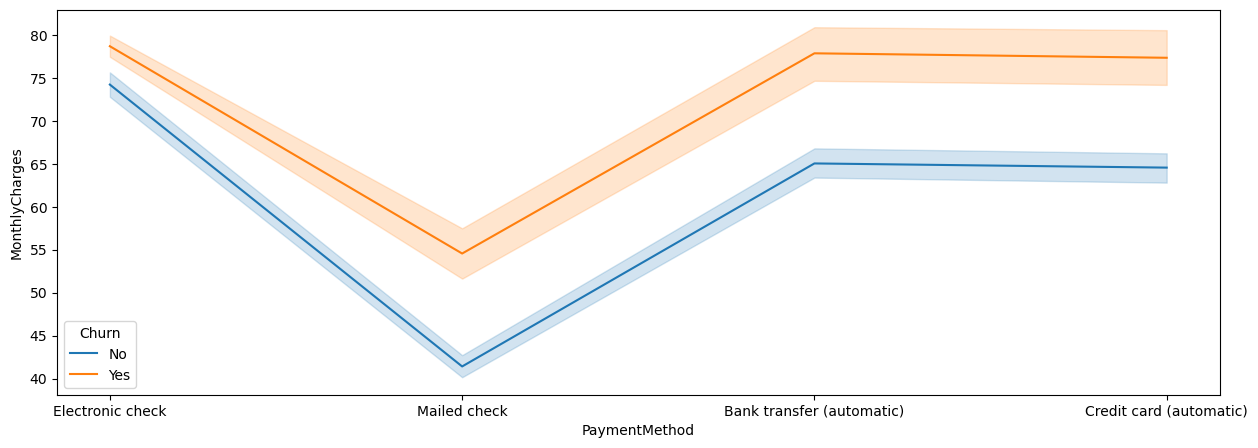

In [66]:
# Look at TotalCharges on Tenure_Groups and Churn, 

plt.figure(figsize=(15,5))
sns.lineplot(x="PaymentMethod", y="MonthlyCharges", data=df, hue="Churn");

In [67]:
# Function to encode Churn. This is required to evaluate the co-relationship of the label with other numeric attributes in the data

def label(Churn):
    if Churn == 'Yes':
        return 1
    else:
        return 0

df['label'] = df['Churn'].apply(label)

In [68]:
# Correlation. Used to examine one column against the other columns

a= df.corr(numeric_only=True)
a

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,label
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324
label,0.150889,-0.352229,0.193356,-0.198324,1.000000


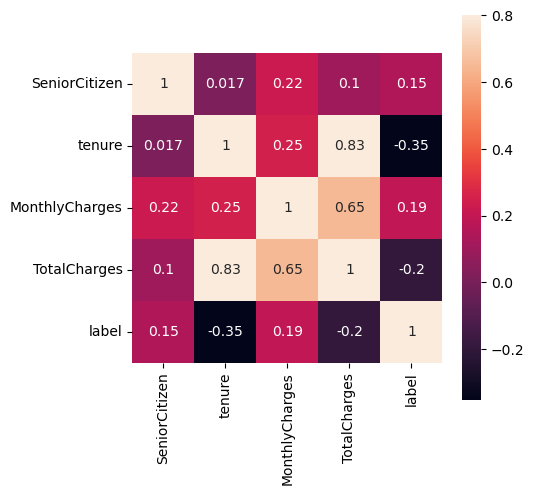

In [69]:
#plt.figure(figsize=(15,5))   # you can also use plt.subplots(figsize(15,5))
plt.subplots(figsize=(5,5))
sns.heatmap(a, vmax=.8, square=True, annot=True);

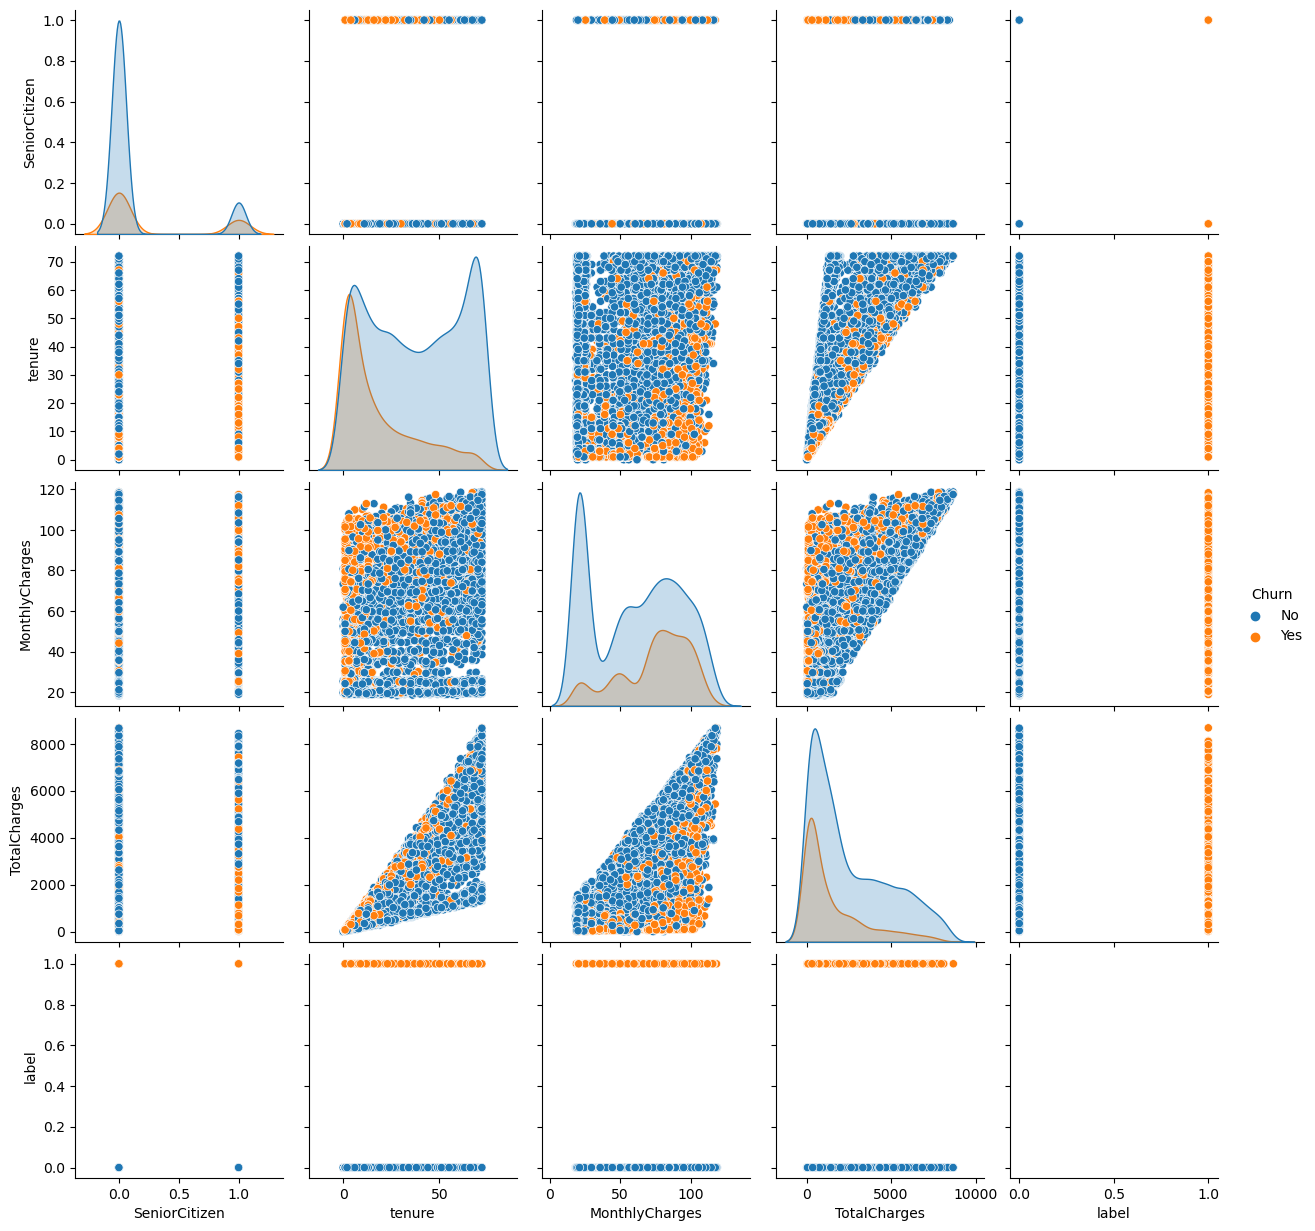

In [70]:
sns.pairplot(df, hue="Churn");

<a id="phase2"></a>
---
## Feature Engineering/Data Pre-processing

The processes involved in this phase include:

- [Creating a copy of the data](#creating)
- [Dropping columns from the dataset](#dropping)
- [Separating the label from the rest of the dataset](#separating)
- [Encoding categorical data](#encoding)
- [Scaling and standardization of the dataset](#scaling)



<a id="creating"></a>
---
**Create a copy of the dataset**

In [71]:
# Make a copy of the dataset before proceeding with feature engineering processes

copy_of_df = df.copy()

copy_of_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Groups,Age_Group,MnthlyCharge_Groups,TotalCharge_Groups,label
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,<= 15 newbies,Youth,<=30_bottom,<= 1000nless,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,31-50 seasoned,Youth,band3,under3k,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,<= 15 newbies,Youth,band2,<= 1000nless,1


<a id="dropping"></a>
---
**Drop extra columns created during EDA process**

In [72]:
df1 = df.drop(columns=['Age_Group','Tenure_Groups','MnthlyCharge_Groups','TotalCharge_Groups','Churn'])

df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,label
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<a id="separating"></a>
---
**Segment the label field from the rest of the data**

In [74]:
churnLabel = pd.DataFrame(df1.pop('label'))

In [75]:
churnLabel

,label
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


<a id="encoding"></a>
---
**Encode the categorical variables in the dataset**

In [76]:
# Encoding 'object' datatpyes using LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in df1.columns:
    if df1[c].dtypes == 'object':
        df1[c] = encoder.fit_transform(df1[c])
    else:
        df1[c] = df1[c]
        

In [77]:
# Verify status of the encoded data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


<a id="scaling"></a>
___
**Scaling/Standardization of the dataset**

In [78]:
# Importing scalers for scaling/standardization the data to minimize the effect of outliers

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [79]:
# Choose a scaler to use from any of the three scalers below and comment the other two

scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [80]:
scaled_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.992611
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172165
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.958066


<a id="phase3"></a>
---
## Model Selection, Training, Testing and Validation
---

Nine (9) classification algorithms have been selected for use in the production of models which will be subsequently analysed to determine the best performing model that will be most suitable to solve the problem specified in the case under review

In [81]:
#import classification models from sckitlearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Import evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [82]:
#splitting data into training and validtion data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, churnLabel, test_size = 0.3, random_state=42)

In [83]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.328164,-0.994838
2715,0.990532,-0.439916,-0.966622,-0.654012,0.351370,0.327438,1.117034,1.527734,0.244242,0.106315,0.108600,0.235518,0.016526,0.008503,-0.828207,0.829798,-1.474052,-1.313208,-0.566163
3825,-1.009559,-0.439916,1.034530,1.529024,0.799294,0.327438,-0.991588,1.527734,0.244242,0.106315,0.108600,0.235518,0.016526,0.008503,1.570749,-1.205113,1.334863,-1.509300,-0.550611
1807,-1.009559,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.991588,0.172250,-0.918838,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,-0.828207,-1.205113,0.398558,0.385148,-0.972096
132,0.990532,-0.439916,-0.966622,-0.654012,1.410099,0.327438,-0.991588,-1.183234,-0.918838,-1.029919,-1.027910,1.396299,-1.113495,-1.121405,1.570749,-1.205113,-1.474052,-0.472339,0.432521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,-1.009559,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.179085,-0.974831
6377,0.990532,-0.439916,-0.966622,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,1.396299,-1.113495,1.138411,-0.828207,0.829798,1.334863,-0.668431,-0.986081
5500,0.990532,-0.439916,1.034530,1.529024,1.125057,0.327438,-0.991588,-1.183234,1.407321,1.242550,1.245111,-0.925262,-1.113495,-1.121405,1.570749,-1.205113,-1.474052,-0.141641,0.624148
2392,0.990532,-0.439916,-0.966622,-0.654012,-0.503758,0.327438,1.117034,0.172250,-0.918838,-1.029919,1.245111,-0.925262,1.146547,-1.121405,-0.828207,0.829798,-0.537747,0.862084,-0.219879


---
**Classification Process Automation**

In [84]:
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [LogisticRegression(), 'Logistic Regression'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'KNNeighbors Classifier'],
               [GaussianNB(), 'Naives Bayes'],
               [SVC(), 'SVC'],
               [LinearSVC(), 'LinearSVC'],
               [SGDClassifier(), 'SGD Classifier']
              ]

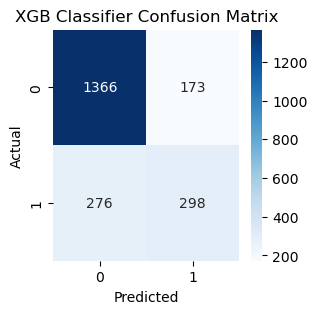

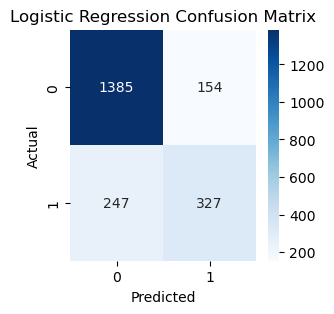

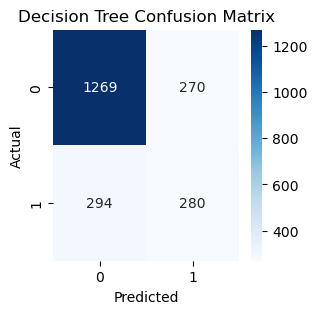

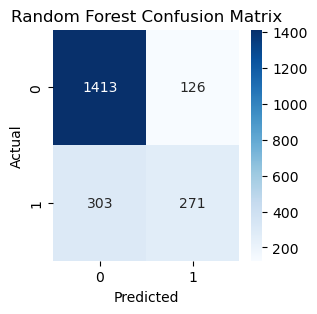

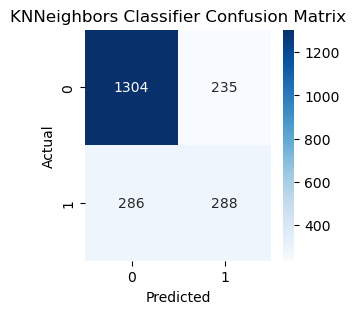

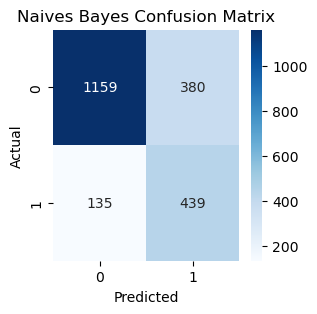

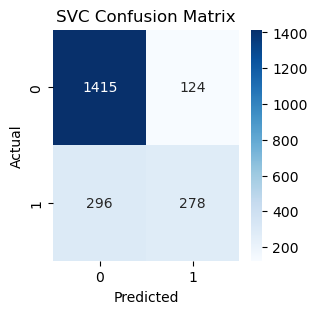

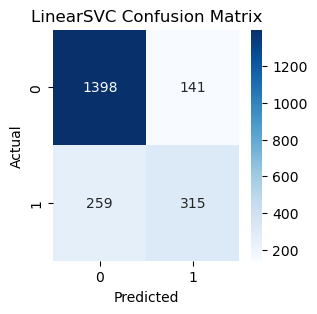

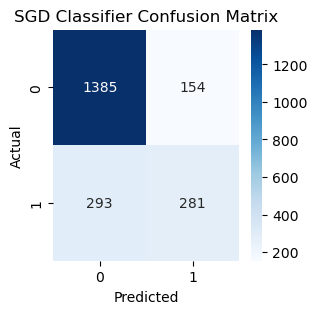

Training, testing and evaluation of all the selected models is now completed


In [85]:
# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Loop to train, test, generate metrics and create confusion matrices for each algorithm
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
   
    pred = model.predict(X_test.values)
        
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = str(round(a_score*100, 2)) + '%'
    precision_list[model_name] = str(round(p_score*100, 2)) + '%'
    recall_list[model_name] = str(round(r_score*100, 2)) + '%'
    f1_list[model_name] = str(round(f_score*100, 2)) + '%'
    roc_list[model_name] = str(round(roc_score*100, 2)) + '%'
    
    #Creating a Confusion Matrix
    cm = confusion_matrix(y_test, pred)

    #Visualizing confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    if model_name == classifiers[-1][1]:
        print('Training, testing and evaluation of all the selected models is now completed')

---
**Report Consolidation**

In [86]:
print('Consolidated Report')
s1 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s1.head()

Consolidated Report


,XGB Classifier,Logistic Regression,Decision Tree,Random Forest,KNNeighbors Classifier,Naives Bayes,SVC,LinearSVC,SGD Classifier
Accuracy Score,78.75%,81.02%,73.31%,79.7%,75.34%,75.63%,80.12%,81.07%,78.85%
Precision Score,63.27%,67.98%,50.91%,68.26%,55.07%,53.6%,69.15%,69.08%,64.6%
Recall Score,51.92%,56.97%,48.78%,47.21%,50.17%,76.48%,48.43%,54.88%,48.95%
F1 Score,57.03%,61.99%,49.82%,55.82%,52.51%,63.03%,56.97%,61.17%,55.7%
ROC Score,70.34%,73.48%,65.62%,69.51%,67.45%,75.89%,70.19%,72.86%,69.47%


<a id="phase4"></a>
---
## Model Evaluation
---

The Linear Support Vector Classification model has the highest accuracy of 81.07%. This means that during the test cycle, it produced the highest number of correct predictions. From its confusion matrix, the TP is 315 and the TN is 1398 making a combined total of 1713 correct predictions out of 2113. Logistic Regression ranks second in accuracy with a score of 81.02% while SVC ranks third with a score of 80.12%.

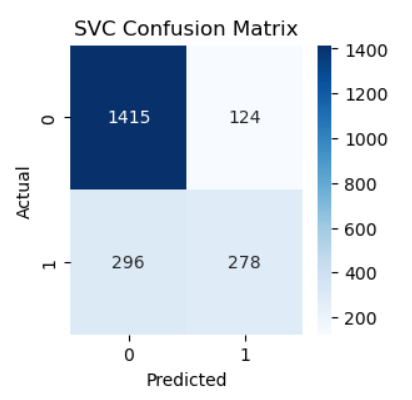   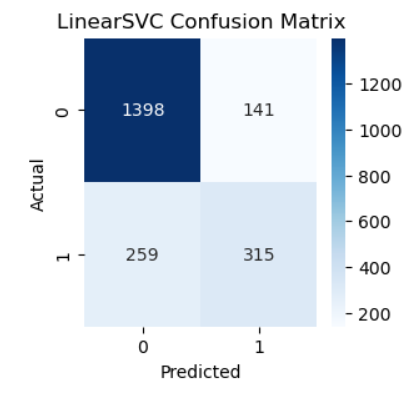

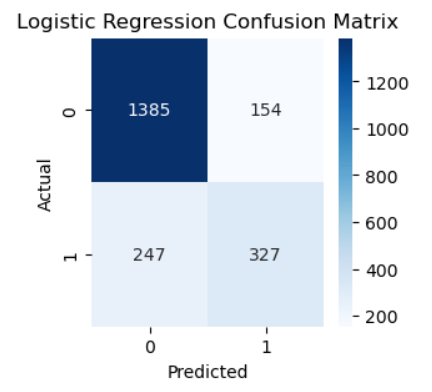

In terms of precision score, SVC ranks first with a score of 69.15% closely followed by Linear SVC's 69.08% with Logistics Regression coming third at 67.98%. 

For the recall metric, Naives Bayes scored the most points with a score of 76.48% while Logistic Regression came in at a distant second with 56.97% and Linear SVC third with 54.88%.

For the case under review, what is most important for the business will be the ability to correctly predict customers that will churn so that they can apply necessary intervention mechanisms to ensure they continue to retain the customer's patronage. This means the business is expected to be more concerned with the true positives (TP) metric more than any other. The TP metric is directly related to the correct prediction of would be "churned customers".

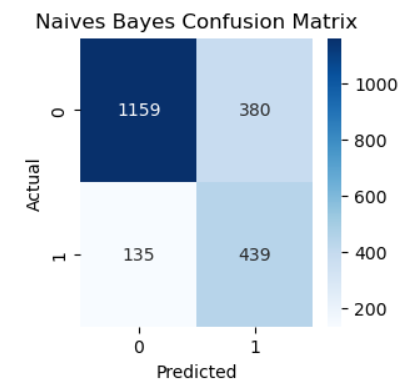

As we can see from the confusion matrices, the Naives Bayes model performed the best in terms of true positive (TP) predictions where 439 correct churn predictions were made during the test. Based on this, the Naives Bayes model will be the most suitable for the business to apply despite it's accuracy ratings.





[Back to the top](#top)